# Маркетинговый анализ для интернет-магазина подарков и украшений

### Дано
Этот набор данных содержит все транзакции, имевшие место в период с 12.01.2010 по 12.09.2011 для британской e-commerce компании, торгующей уникальными подарками на все случаи жизни. Многие клиенты компании являются оптовиками.

### Вопросы
1) К каким группам клиентов какие маркетинговые мероприятия нужно применить?\
2) Какие товары в рамках промо-активностей предлагать клиентам?

### Задачи
1) Сегментировать клиентов\
2) Подобрать релевантные маркетинговые активности для каждого сегмента\
3) Подобрать релевантные рекомендации по товарам для промо-активностей

### Описание данных
- **InvoiceNo:** Номер чека, состоящий из 6 цифр. Если номер начинается с буквы 'c', значит была отмена.
- **StockCode:** Код продукта, состоящий из 5 цифр.
- **Description:** Название продукта.
- **Quantity:** Количество продукта в чеке.
- **InvoiceDate:** Дата и время транзакции.
- **UnitPrice:** Цена продукта.
- **CustomerID:** Уникальный идентификатор клиента, состоящий из 5 цифр.
- **Country:** Страна клиента.

### Содержание проекта

**1\. Предобработка данных, EDA**\
**2\. RFM-анализ**\
**2.1\. Классический RFM-анализ с рекомендациями по маркетинговым активностям**\
**2.2\. Доп.анализ по частоте заказов с дополнением к маркетинговым активностям**\
**3\. Когортный анализ**\
**4\. Доп.сегментация по покупательскому поведению**\
**5\. Подбор рекомендуемых товаров для маркетинговых акций**\
**6\. Итоговые отчеты**

## 1. Предобработка данных, EDA

Итоги предобработки:
- форматы исправлены
- удалены пропуски по полям CustomerID и Description
- дубликаты агрегированы (сумма по количеству)
- отмененные заказы удалены
- удалены выбросы по количеству, цене, доходу на 1 клиента, числу заказов на 1 клиента, числу позиций на 1 заказ, аномалии в распределении числа заказов по датам не выявлены - пики приходятся на предрождественский период.

Итого удалены данные 1.8% клиентов.

Абсолютное большинство заказов приходится на Великобританию - 91%.

Самыми популярными покупками по месяцам были:
- в предрождественские и рождественские месяцы - подсвечники в форме обнимающихся сердечек, ночники в виде символа нового года, бумажные рождественские цепочки
- в феврале-марте - наборы из 3 тарелок или формочек для запекания (8 марта и день Матери в Великобритании)
- в апреле-июле - подвески из флажков для украшения мест вечеринок
- в августе-сентябре - подарочные мешки и термосы с мотивирующими надписями (в отсутствие больших праздников на первый план вышло оформление подарков и типичные подарки офисникам.

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
import random
import textwrap
%matplotlib inline

In [2]:
data0 = pd.read_csv(r'C:\\Users\Михаил\Desktop\Data analysis\Проекты\Marketing analysis\data.csv',
                 encoding = 'unicode_escape',
                 parse_dates = ['InvoiceDate'])
data0.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data0.CustomerID = data0.CustomerID.astype('Int64')

In [5]:
data0.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Рассмотрим строки, где есть пропущенные значения по полю Description.

In [6]:
data0[data0.Description.isna()].iloc[[random.randint(0,1453) for i in range(10)],:]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
277041    561086     15036         NaN      -530 2011-07-25 09:32:00   
269195    560440    84029E         NaN        -1 2011-07-18 16:36:00   
264706    560112     21683         NaN       -38 2011-07-15 09:52:00   
162504    550502    84535A         NaN       320 2011-04-18 15:29:00   
495919    578338     22125         NaN         1 2011-11-24 09:07:00   
45394     540256     35957         NaN        35 2011-01-05 17:21:00   
271822    560722     16049         NaN       -31 2011-07-20 13:37:00   
336410    566323     22035         NaN         1 2011-09-12 12:02:00   
165036    550761     84388         NaN         6 2011-04-20 12:10:00   
281570    561539    79026B         NaN        -1 2011-07-28 10:08:00   

        UnitPrice  CustomerID         Country  
277041        0.0        <NA>  United Kingdom  
269195        0.0        <NA>  United Kingdom  
264706        0.0        <NA>  United Kingdom  
162504        0.0        <NA>  United Kingdom  
495919        0.0        <NA>  United Kingdom  
45394         0.0        <NA>  United Kingdom  
271822        0.0        <NA>  United Kingdom  
336410        0.0        <NA>  United Kingdom  
165036        0.0        <NA>  United Kingdom  
281570        0.0        <NA>  United Kingdom

In [7]:
data0[data0.Description.isna()].CustomerID.unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

Все строки с пропущенными значениями по полю Description входят в массив строк с пропущенными значениями по полю CustomerID.

In [8]:
data0[data0.Description.isna()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

У всех таких строк нулевое значение цены.

In [9]:
(data0[data0.Description.isna()].Quantity < 0).sum()

862

Более половины строк имеют отрицательное значение по количеству. Возможно это отмененные заказы, к которым не подтянулся признак "с" в InvoiceNo. Проверим, нет ли таких же номеров заказов среди заказов без пропущенных значений в этом поле.

In [10]:
l = data0[data0.Description.isna()].InvoiceNo.unique()
data0[data0.Description.isna() == False].query('InvoiceNo in @l').shape[0]

0

Такие заказы отсутствуют. Строки с пропущенными значениями в полях Description, CustomerID не информативны, их можно исключить.

In [11]:
data_clean = data0[data0.Description.isna() == False]

In [12]:
data_clean.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Теперь рассмотрим отдельно строки с пропущенными значениями в столбце CustomerID.

In [13]:
data_clean[data_clean.CustomerID.isna()].iloc[[random.randint(0,133625) for i in range(10)],:]

InvoiceNo StockCode                         Description  Quantity  \
29277     538724     22311     OFFICE MUG WARMER BLACK+SILVER          1   
358177    568135     35954    SMALL FOLKART STAR CHRISTMAS DEC        20   
38201     539492     48185                  DOORMAT FAIRY CAKE         1   
129863    547396     21239                  PINK  POLKADOT CUP         8   
71144     542109     21239                  PINK  POLKADOT CUP         1   
209889    555275     48194                      DOORMAT HEARTS         1   
278403    561214     22766                 PHOTO FRAME CORNICE         1   
168144    551012    84989a           75 GREEN FAIRY CAKE CASES         1   
44081     540154    90125D  PURPLE BERTIE GLASS BEAD BAG CHARM         1   
114092    546007     22722   SET OF 6 SPICE TINS PANTRY DESIGN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
29277  2010-12-14 11:12:00       2.95        <NA>  United Kingdom  
358177 2011-09-23 17:04:00       0.31        <NA>  United Kingdom  
38201  2010-12-20 10:14:00      14.43        <NA>  United Kingdom  
129863 2011-03-22 16:54:00       1.63        <NA>  United Kingdom  
71144  2011-01-25 13:44:00       1.63        <NA>  United Kingdom  
209889 2011-06-01 17:18:00      15.79        <NA>  United Kingdom  
278403 2011-07-25 17:00:00       5.79        <NA>  United Kingdom  
168144 2011-04-26 10:32:00       2.08        <NA>  United Kingdom  
44081  2011-01-05 11:30:00       1.66        <NA>  United Kingdom  
114092 2011-03-08 15:34:00       8.29        <NA>  United Kingdom

Посмотрим, есть ли такие же номера заказа в остальных строках, чтобы по этим номерам восстановить CustomerID.

In [14]:
l = data_clean[data_clean.CustomerID.isna()].InvoiceNo.unique()
data_clean[data_clean.CustomerID.isna() == False].query('InvoiceNo in @l').shape[0]

0

Такие строки отсутствуют. По остальным параметрам, включая дату и время смотреть нецелесообразно. Эти строки также исключаем, так как наша цель сегментировать клиентов.

In [15]:
data_clean = data_clean[data_clean.CustomerID.isna() == False]

In [16]:
data_clean.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Избавились от пропущенных значений. Рассмотрим дубликаты

In [17]:
data_clean.duplicated().sum()

5225

In [18]:
data_clean[data_clean.duplicated(keep=0)].sort_values(list(data_clean.columns)).head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
494 2010-12-01 11:45:00       1.25       17908  United Kingdom  
517 2010-12-01 11:45:00       1.25       17908  United Kingdom  
485 2010-12-01 11:45:00       4.95       17908  United Kingdom  
539 2010-12-01 11:45:00       4.95       17908  United Kingdom  
489 2010-12-01 11:45:00       2.10       17908  United Kingdom  
527 2010-12-01 11:45:00       2.10       17908  United Kingdom  
521 2010-12-01 11:45:00       2.95       17908  United Kingdom  
537 2010-12-01 11:45:00       2.95       17908  United Kingdom  
578 2010-12-01 11:49:00       1.65       17920  United Kingdom  
598 2010-12-01 11:49:00       1.65       17920  United Kingdom

In [19]:
data_clean[data_clean.duplicated(keep=0)].sort_values(list(data_clean.columns)).tail(10)

InvoiceNo StockCode                          Description  Quantity  \
411643   C572226     85066          CREAM SWEETHEART MINI CHEST        -1   
411644   C572226     85066          CREAM SWEETHEART MINI CHEST        -1   
436250   C574095     22326  ROUND SNACK BOXES SET OF4 WOODLAND         -1   
436251   C574095     22326  ROUND SNACK BOXES SET OF4 WOODLAND         -1   
440148   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

               InvoiceDate  UnitPrice  CustomerID         Country  
411643 2011-10-21 13:58:00      12.75       15321  United Kingdom  
411644 2011-10-21 13:58:00      12.75       15321  United Kingdom  
436250 2011-11-03 09:54:00       2.95       12674          France  
436251 2011-11-03 09:54:00       2.95       12674          France  
440148 2011-11-04 13:25:00       2.95       15110  United Kingdom  
440149 2011-11-04 13:25:00       2.95       15110  United Kingdom  
461407 2011-11-13 11:38:00       0.55       17838  United Kingdom  
461408 2011-11-13 11:38:00       0.55       17838  United Kingdom  
529980 2011-12-06 10:38:00       2.95       14562  United Kingdom  
529981 2011-12-06 10:38:00       2.95       14562  United Kingdom

Так как у нас данные E-commerce магазина, дубликаты не могут быть связаны с очередностью "пробития" товаров на кассе. Одинаковые позиции должны агрегироваься в чеке, но одному и тому же коду продукта могут соответствовать товары разного цвета, например, и поэтому включаться в чек отдельно. 

У нас нет дополнительных данных, позволяющих считать дубликаты технической ошибкой, поэтому объединим дублирующиеся строки, суммировав значения по объему.

In [20]:
data_clean = data_clean.groupby([col for col in list(data_clean.columns) if col != 'Quantity'], as_index=0)\
.agg({'Quantity':'sum'}).iloc[:,[0,1,2,7,3,4,5,6]]

In [21]:
data_clean.duplicated().sum()

0

Дубликаты агрегированы.

Также исключим отмененные заказы. Проверим, нет ли в массиве аналогичных номеров заказов без пометки "С".

In [22]:
l = data_clean[data_clean.InvoiceNo.str.contains('C')].InvoiceNo.str[1:-1].unique()
data_clean.query('InvoiceNo in @l').shape[0]

0

Таких заказов нет, значит удаляем только заказы с пометкой "С".

In [23]:
data_clean = data_clean[data_clean.InvoiceNo.str.contains('C') == False]

In [24]:
data_clean.query('Quantity < 0').shape[0]

0

Отмененные заказы удалены. Отрицательные значения по количеству ушли вместе с ними.

Посмотрим на временные параметры.

In [25]:
data_clean.head(1)

InvoiceNo StockCode                        Description  Quantity  \
0    536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       4.25       17850  United Kingdom

In [26]:
data_clean.InvoiceDate.apply(['min', 'max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

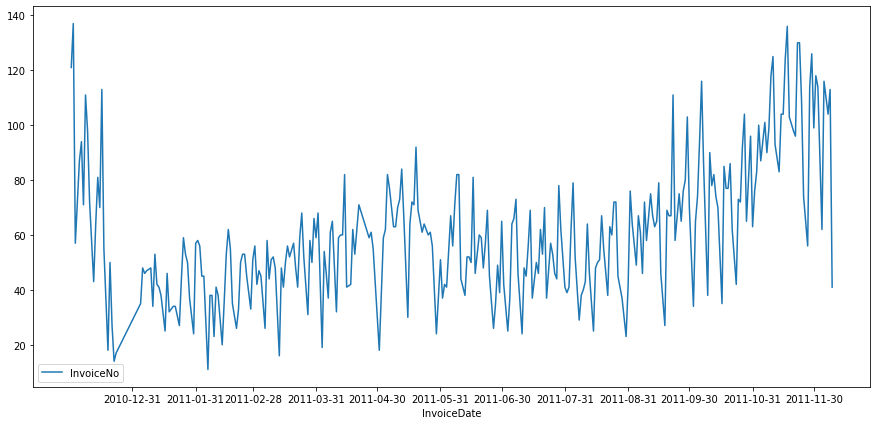

In [27]:
data_clean.groupby(data_clean.InvoiceDate.dt.date).agg({'InvoiceNo':'nunique'}).plot(figsize=(15,7))
plt.xticks(pd.date_range(start='2010-12-01', end='2011-12-09', freq='M'))
plt.show()

Явные аномалии по количеству заказов в день отсутствуют. Пики приходятся на предрождественский период.

Рассмотрим распределение количества и цен.

In [28]:
data_clean[['Quantity', 'UnitPrice']].quantile([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

0.00  0.25  0.50   0.75  0.95    0.99      1.00
Quantity    1.0  2.00  6.00  12.00  40.0  125.21  80995.00
UnitPrice   0.0  1.25  1.95   3.75   8.5   14.95   8142.75

Заметны выбросы по обоим параметрам.

In [29]:
data_clean.query('Quantity > 125.21').shape[0]

3880

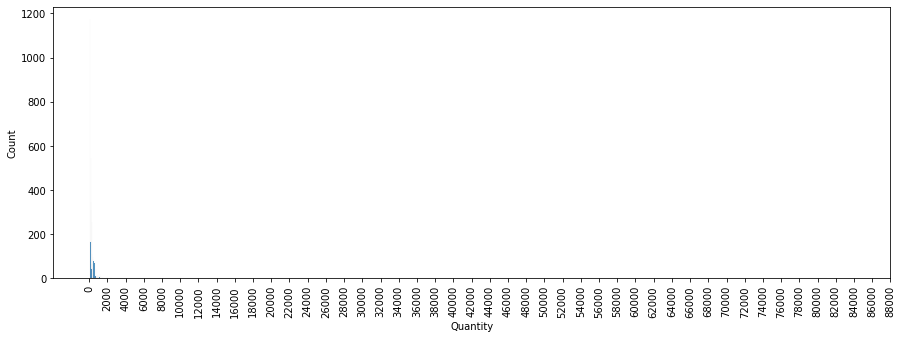

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.query('Quantity > 125.21'), x = 'Quantity')
plt.xticks(range(0,90000,2000), rotation=90)
plt.show()

Основная часть значений лежит в диапазоне до 2000 шт. Рассмотрим эту область подробнее.

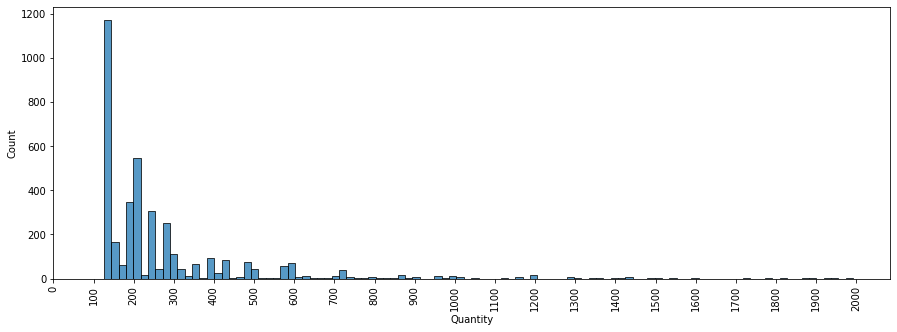

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.query('Quantity > 125.21 & Quantity < 2000'), x = 'Quantity')
plt.xticks(range(0,2001,100), rotation=90)
plt.show()

Исключим строки с количеством >600.

Аналогично рассмотрим выбросы по цене.

In [32]:
data_clean.query('UnitPrice > 14.95').shape[0]

3721

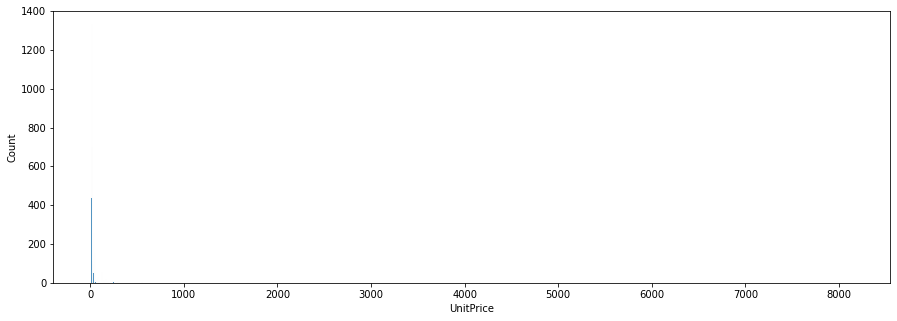

In [33]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.query('UnitPrice > 14.95'), x = 'UnitPrice')
plt.show()

Основная часть значений лежит в диапазоне до 400 евро. Рассмотрим эту область подробнее.

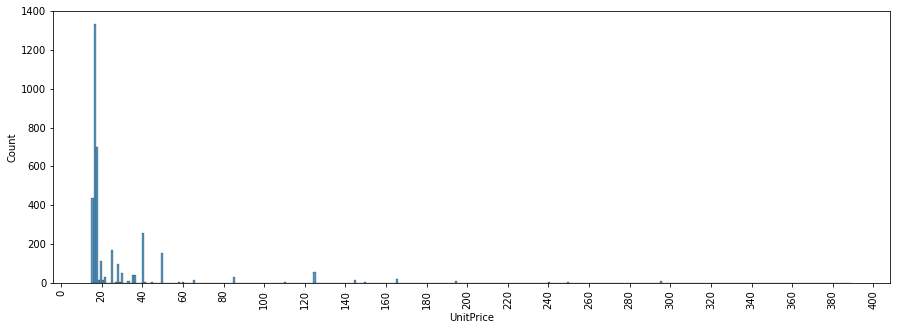

In [34]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.query('UnitPrice > 14.95 & UnitPrice < 400'), x = 'UnitPrice')
plt.xticks(range(0,401,20), rotation=90)
plt.show()

Исключим строки с ценой >140 евро.

Было бы некорректно удалять отдельные позиции с аномальными ценой/количеством из заказов. Также некорректно было бы удалять отдельные аномальные заказы у клиентов, так как в этом случае оставшиеся заказы клиента будут некорректно его характеризовать. Поэтому удалим целиком данные клиентов с аномальными позициями. Это отдельный класс клиентов, подход к которым должен быть индивидуальным. В случае аномального количества - оптовики, в случае аномально высокой цены - суперпремиальный сегмент или ошибка в данных.

Посмотрим, сколько строк и клиентов мы удаляем.

In [35]:
print(f"Удаленных строк (аномально высокое кол-во или цена): \
{round(data_clean.query('Quantity > 600 | UnitPrice > 140').shape[0] *100 / data_clean.shape[0], 2)} %")
print(f"Удаленных клиентов (оптовики и премиалы): \
{round(data_clean.query('Quantity > 600 | UnitPrice > 140').CustomerID.nunique() *100 / data_clean.CustomerID.nunique(), 2)} %")

Удаленных строк (аномально высокое кол-во или цена): 0.1 %
Удаленных клиентов (оптовики и премиалы): 3.16 %


Заметно, что у аномальных клиентов в среднем меньше закупаемых позиций.

In [36]:
l = data_clean.query('Quantity > 600 | UnitPrice > 140').CustomerID.unique()
data_clean.query('CustomerID in @l').groupby('CustomerID').agg({'StockCode':'count'}).quantile([0,0.5,0.90,0.95,1]).T

0.00  0.50   0.90   0.95    1.00
StockCode   1.0  73.0  389.0  597.6  5672.0

In [37]:
data_clean.groupby('CustomerID').agg({'StockCode':'count'}).quantile([0,0.5,0.90,0.95,1]).T

0.00  0.50   0.90   0.95    1.00
StockCode   1.0  41.0  200.0  305.0  7478.0

Причем преимущество обычных клиентов по количеству позиций формируется засчет небольшой группы клиентов (<5%), закупающих множество различных позиций, так как до 95 квантиля преимущество по количеству позиций на клиента у оптовиков-премиалов.

In [38]:
data_clean = data_clean.query('Quantity < 600 & UnitPrice < 140')

Посмотрим количество заказов и закупаемых позиций на одного клиента.

Начнем с количества заказов.

In [39]:
data_clean.groupby('CustomerID').agg({'InvoiceNo':'nunique'}).quantile([0,0.25,0.5,0.75,0.95,0.99,1]).T

0.00  0.25  0.50  0.75  0.95  0.99   1.00
InvoiceNo   1.0   1.0   2.0   5.0  13.0  30.0  208.0

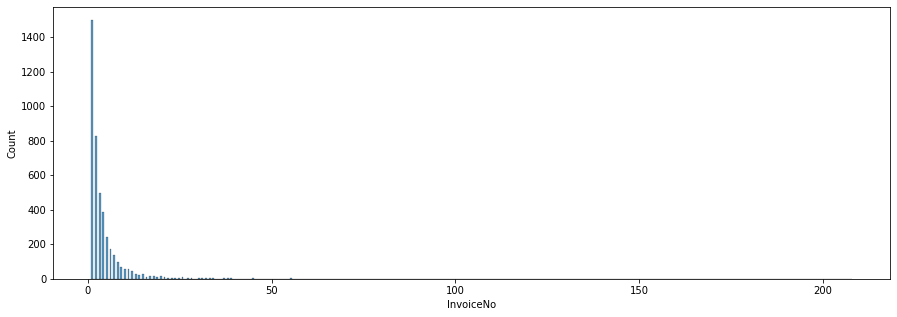

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceNo':'nunique'}),
             x = 'InvoiceNo')
#plt.xticks(range())
plt.show()

Большая часть значений лежит в диапазоне до 100 заказов на одного клиента. Рассмотрим более подробно эту область.

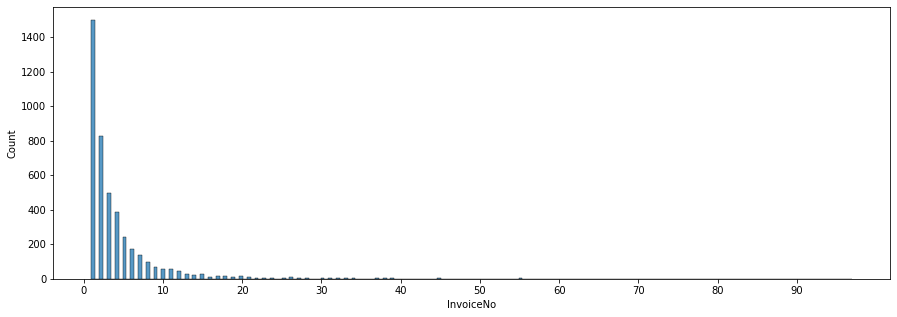

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceNo':'nunique'})\
             .query('InvoiceNo < 100'),
             x = 'InvoiceNo')
plt.xticks(range(0,100,10))
plt.show()

Исключим из общего анализа клиентов с числом заказов больше 60.

In [42]:
round(data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceNo':'nunique'})\
      .query('InvoiceNo >= 60').shape[0] *100 /\
      data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceNo':'nunique'}).shape[0], 2)

0.25

Таких клиентов всего 0.25 % от общего числа оставшихся клиентов.

In [43]:
l = data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceNo':'nunique'}).query('InvoiceNo >= 60').CustomerID
data_clean = data_clean.query('CustomerID not in @l')

Рассмотрим число позиций на один заказ.

Но сначала убедимся, что номера заказов уникальны без привязки к клиенту.

In [44]:
data_clean.groupby('InvoiceNo').agg({'CustomerID':'nunique'}).max()

CustomerID    1
dtype: int64

Да, все ок.

In [45]:
data_clean.groupby('InvoiceNo').agg({'StockCode':'count'}).quantile([0,0.25,0.5,0.75,0.95,0.99,1]).T

0.00  0.25  0.50  0.75  0.95   0.99   1.00
StockCode   1.0   7.0  15.0  27.0  61.0  102.0  541.0

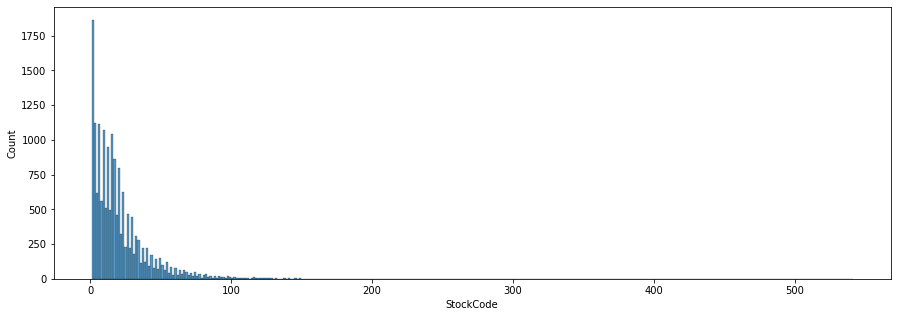

In [46]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('InvoiceNo', as_index=0).agg({'StockCode':'count'}),
             x = 'StockCode')
#plt.xticks(range())
plt.show()

Большая часть значений лежит в диапазоне до 200 позиций на один заказ. Рассмотрим более подробно эту область.

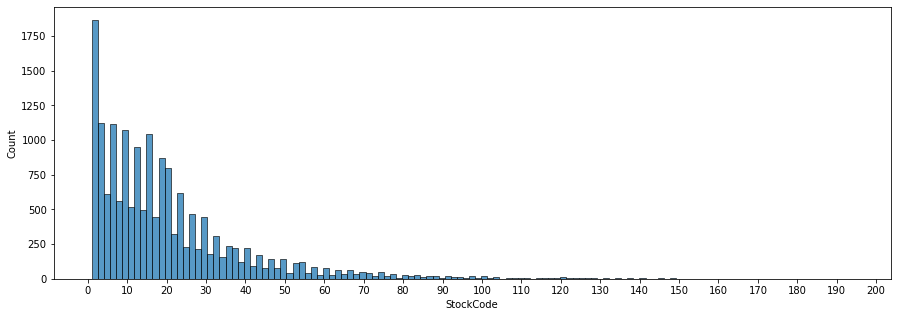

In [47]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('InvoiceNo', as_index=0).agg({'StockCode':'nunique'})\
             .query('StockCode < 200'),
             x = 'StockCode')
plt.xticks(range(0,201,10))
plt.show()

Исключим из общего анализа клиентов с количеством уникальных позиций на один заказ больше 150.

In [48]:
round(data_clean.groupby(['CustomerID','InvoiceNo'], as_index=0).agg({'StockCode':'count'})\
      .query('StockCode >= 150').CustomerID.nunique() *100 /\
      data_clean.groupby(['CustomerID','InvoiceNo'], as_index=0).agg({'StockCode':'count'})\
      .CustomerID.nunique(), 2)

0.63

Таких клиентов всего 0.63 % от общего числа оставшихся клиентов.

In [49]:
l = data_clean.groupby(['CustomerID','InvoiceNo'], as_index=0).agg({'StockCode':'count'})\
.query('StockCode >= 150').CustomerID.unique()
data_clean = data_clean.query('CustomerID not in @l')

Добавим столбец Доход (Revenue) = Количество х Цена

In [50]:
data_clean['Revenue'] = data_clean.Quantity * data_clean.UnitPrice

Рассмотрим выбросы и по этому параметру.

In [51]:
data_clean.groupby('CustomerID').agg({'Revenue':'sum'}).quantile([0,0.25,0.5,0.75,0.95,0.99,1]).T

0.00    0.25     0.50       0.75       0.95        0.99       1.00
Revenue   2.9  302.67  658.605  1603.5625  5424.4155  14095.3247  121017.33

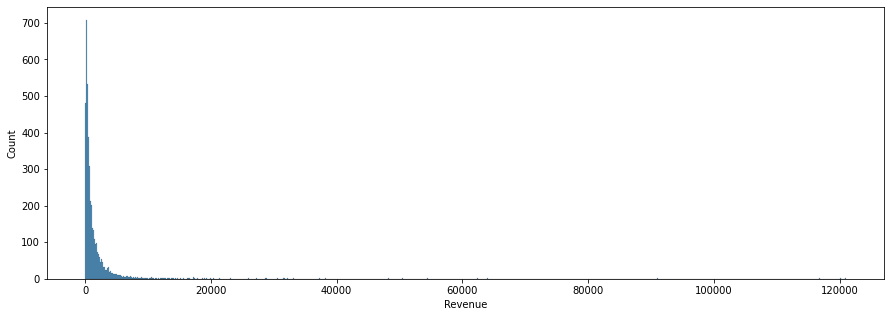

In [52]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('CustomerID').agg({'Revenue':'sum'}),
             x = 'Revenue')
#plt.xticks(range())
plt.show()

Большая часть значений лежит в диапазоне до 40000 евро доход на одного клиента. Рассмотрим более подробно эту область.

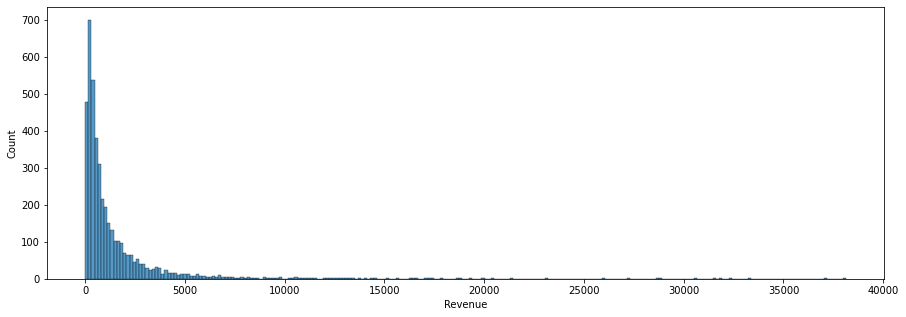

In [53]:
plt.figure(figsize=(15,5))
sns.histplot(data = data_clean.groupby('CustomerID').agg({'Revenue':'sum'}).query('Revenue < 40000'),
             x = 'Revenue')
plt.xticks(range(0,40000+1,5000))
plt.show()

Исключим из общего анализа клиентов с доходом >20000 евро.

In [54]:
round(data_clean.groupby('CustomerID', as_index=0).agg({'Revenue':'sum'})\
      .query('Revenue >= 20000').CustomerID.nunique() *100 /\
      data_clean.groupby('CustomerID', as_index=0).agg({'Revenue':'sum'}).CustomerID.nunique(), 2)

0.54

Таких клиентов всего 0.54 % от общего числа оставшихся клиентов.

In [55]:
l = data_clean.groupby('CustomerID', as_index=0).agg({'Revenue':'sum'}).query('Revenue >= 20000').CustomerID.unique()
data_clean = data_clean.query('CustomerID not in @l')

Все выбросы удалены, данные нестандартных клиентов больше не смещают показатели общего массива. Предобработка данных завершена.

Посмотрим, какая доля клиентов осталась по сравнению с первоначальным массивом.

In [56]:
print('После удаления данных клиентов с аномалиями по количеству товара, цене, количеству заказов на одного клиента,\
общему доходу на одного клиента остались данные {} % клиентов (относительно первоначального массива \
без учета отмененных заказов).'\
      .format(round(data_clean.CustomerID.nunique() *100 / \
                    data0[data0.InvoiceNo.str.contains('C') == 0].CustomerID.nunique(), 2)))

После удаления данных клиентов с аномалиями по количеству товара, цене, количеству заказов на одного клиента,общему доходу на одного клиента остались данные 98.2 % клиентов (относительно первоначального массива без учета отмененных заказов).


Рассмотрим географию распределения заказов на карте.

In [57]:
world_map = data_clean[['CustomerID', 'InvoiceNo', 'Country']
              ].groupby(['CustomerID', 'InvoiceNo', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis_r',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

In [58]:
s = data_clean.groupby('Country', as_index=0).agg({'InvoiceNo':'nunique'})\
.sort_values('InvoiceNo', ascending=0).reset_index(drop=1)
s['%'] = round(s.InvoiceNo *100 / s.InvoiceNo.sum(), 1)
s['cum_%'] = s['%'].cumsum()
s.head(10)

Country  InvoiceNo     %  cum_%
0  United Kingdom      14861  91.0   91.0
1         Germany        452   2.8   93.8
2          France        383   2.3   96.1
3         Belgium         98   0.6   96.7
4           Spain         90   0.6   97.3
5     Switzerland         50   0.3   97.6
6        Portugal         42   0.3   97.9
7         Finland         40   0.2   98.1
8           Italy         38   0.2   98.3
9       Australia         36   0.2   98.5

Абсолютное большинство заказов приходится на Великобританию - 91%.

In [59]:
data_clean.groupby([data_clean.InvoiceDate.dt.to_period('M'), data_clean.Description])\
.agg(n_purchase=('InvoiceNo','count')).reset_index().sort_values(['InvoiceDate','n_purchase'], ascending=[1,0])\
.groupby('InvoiceDate').head(1)

InvoiceDate                         Description  n_purchase
2231      2010-12  WHITE HANGING HEART T-LIGHT HOLDER         183
4266      2011-01  WHITE HANGING HEART T-LIGHT HOLDER         136
5954      2011-02   SET OF 3 CAKE TINS PANTRY DESIGN          120
7988      2011-03            REGENCY CAKESTAND 3 TIER         155
9875      2011-04                       PARTY BUNTING         153
12591     2011-05                      SPOTTY BUNTING         190
14243     2011-06                       PARTY BUNTING         164
17108     2011-07                      SPOTTY BUNTING         139
18443     2011-08             JUMBO BAG RED RETROSPOT         128
20745     2011-09          HOT WATER BOTTLE KEEP CALM         178
23639     2011-10     PAPER CHAIN KIT 50'S CHRISTMAS          183
26474     2011-11                  RABBIT NIGHT LIGHT         401
28717     2011-12                  RABBIT NIGHT LIGHT         100

Самыми популярными покупками по месяцам были:
- в предрождественские и рождественские месяцы - подсвечники в форме обнимающихся сердечек, ночники в виде символа нового года, бумажные рождественские цепочки 
- в феврале-марте - наборы из 3 тарелок или формочек для запекания (8 марта и день Матери в Великобритании)
- в апреле-июле - подвески из флажков для украшения мест вечеринок
- в августе-сентябре - подарочные мешки и термосы с мотивирующими надписями (в отсутствие больших праздников на первый план вышло оформление подарков и типичные подарки офисникам. 

**Итоги предобработки**:
- форматы исправлены
- удалены пропуски по полям CustomerID и Description
- дубликаты агрегированы (сумма по количеству)
- отмененные заказы удалены
- удалены выбросы по количеству, цене, доходу на 1 клиента, числу заказов на 1 клиента, числу позиций на 1 заказ, аномалии в распределении числа заказов по датам не выявлены - пики приходятся на предрождественский период.

Итого удалены данные 1.8% клиентов.

Абсолютное большинство заказов приходится на Великобританию - 91%.

Самыми популярными покупками по месяцам были:
- в предрождественские и рождественские месяцы - подсвечники в форме обнимающихся сердечек, ночники в виде символа нового года, бумажные рождественские цепочки
- в феврале-марте - наборы из 3 тарелок или формочек для запекания (8 марта и день Матери в Великобритании)
- в апреле-июле - подвески из флажков для украшения мест вечеринок
- в августе-сентябре - подарочные мешки и термосы с мотивирующими надписями (в отсутствие больших праздников на первый план вышло оформление подарков и типичные подарки офисникам.

## 2. RFM-анализ

### 2.1. Классический RFM-анализ с рекомендациями по маркетинговым активностям

Перед проведением RFM-анализа рассчитаем все необходимые параметры.

In [60]:
data_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
1    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
2    536365     71053                  WHITE METAL LANTERN         6   
3    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
4    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       4.25       17850  United Kingdom    25.50  
1 2010-12-01 08:26:00       7.65       17850  United Kingdom    15.30  
2 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34

Сформируем данные по клиентам, рассчитаем показатели Recency, Frequency, Monetary. В качестве даты анализа установим следующий день после даты окончания сбора данных.

Показатель Frequency будет рассчитываться как количество уникальных дней заказов, так как в день могло быть совершено несколько заказов, но от большого количества заказов, совершенных в рамках 1 дня, клиент не должен считаться постоянным.

Также рассчитаем некоторые относительные показатели: период активности - количество дней с первого заказа до последнего, среднее количество дней на 1 заказ и средний чек на 1 заказ.

In [61]:
day_of_report = data_clean.InvoiceDate.max() + dt.timedelta(days=1)
customers = data_clean.groupby('CustomerID', as_index=0).agg({'InvoiceDate':['min','max'],
                                                              'Revenue':'sum'}).round(2)
customers.columns = [i+'_'+j if j != '' else i for i,j in customers.columns]
customers = customers.rename(columns={'Revenue_sum':'Monetary'})
customers['Recency'] = (day_of_report - customers.InvoiceDate_max).dt.days
customers['Days_active'] = (customers.InvoiceDate_max - customers.InvoiceDate_min).dt.days +1
customers = customers.merge(
    data_clean.groupby('CustomerID').apply(lambda df: df.InvoiceDate.dt.date.nunique())\
    .reset_index().rename(columns={0:'Frequency'}), on='CustomerID')
customers['Days_per_InvoiceDay'] = round(customers.Days_active / customers.Frequency, 2)
customers['AVG_check_of_InvoiceDay'] = round(customers.Monetary / customers.Frequency, 2)
customers = customers.loc[:,['CustomerID','InvoiceDate_min','InvoiceDate_max','Days_active','Recency',
                             'Frequency','Monetary','Days_per_InvoiceDay','AVG_check_of_InvoiceDay']]
customers.head()

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   
1       12348 2010-12-16 19:09:00 2011-09-25 13:13:00          283       75   
2       12349 2011-11-21 09:51:00 2011-11-21 09:51:00            1       19   
3       12350 2011-02-02 16:01:00 2011-02-02 16:01:00            1      310   
4       12352 2011-02-16 12:33:00 2011-11-03 14:37:00          261       36   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  
0          7   4310.00                52.29                   615.71  
1          4   1797.24                70.75                   449.31  
2          1   1457.55                 1.00                  1457.55  
3          1    334.40                 1.00                   334.40  
4          7   1665.74                37.29                   237.96

Рассмотрим распределение по каждому из получившихся  RFM-параметров.

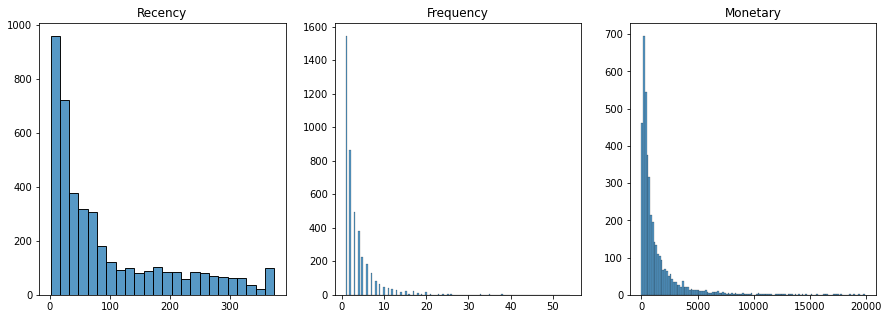

In [62]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
col = ['Recency','Frequency','Monetary']
for i in range(3):
    sns.histplot(data=customers, x=col[i], ax=ax[i])
    ax[i].set_title(col[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
plt.show()

Рассмотрим числовые параметры распределений.

In [63]:
customers[['Recency', 'Frequency', 'Monetary']].quantile([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

0.00   0.25    0.50     0.75     0.95       0.99      1.00
Recency     1.0   18.0   52.00   145.00   312.00    369.000    374.00
Frequency   1.0    1.0    2.00     4.00    11.00     20.000     54.00
Monetary    2.9  302.1  655.75  1578.67  5112.79  10929.314  19914.44

Многие клиенты делали покупки в течение не более 2 дней в общей сложности. Рассмотрим этот показатель подробнее

In [64]:
s = customers.Frequency.value_counts(normalize=1).mul(100).round(1).reset_index()\
.rename(columns={'Frequency':'%','index':'Frequency'})
s['cum_%'] = s['%'].cumsum()
s.head()

Frequency     %  cum_%
0          1  36.3   36.3
1          2  20.3   56.6
2          3  11.6   68.2
3          4   9.0   77.2
4          5   5.2   82.4

36.3% клиентов совершали покупки лишь 1 раз (в течение 1 дня).\
56.6% - 1 или 2.\
68.2% - не более 3 раз.

Рассмотрим распределение пользователей по осям Recency и Frequency с выделением с помощью размера и цвета по общему доходу (Monetary).

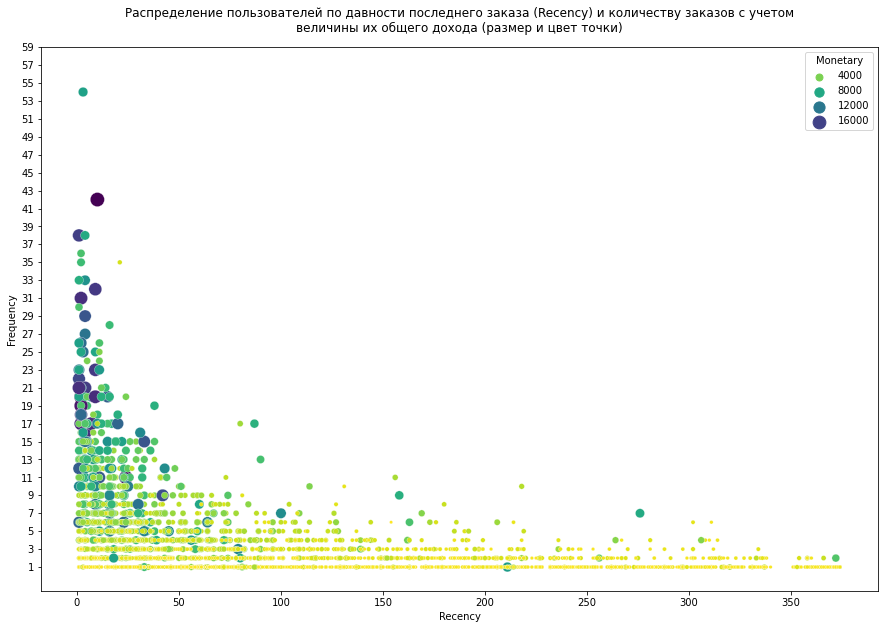

In [65]:
plt.figure(figsize=(15,10))
plt.title(textwrap.fill('Распределение пользователей по давности последнего заказа (Recency) и \
количеству заказов с учетом величины их общего дохода (размер и цвет точки)', 100), pad=15)
sns.scatterplot(data=customers, x='Recency', y='Frequency', 
                hue='Monetary', palette='viridis_r',
                size='Monetary', sizes=(10,200))
#sns.lineplot([0, 380], [2.5, 2.5], linewidth=1, color='grey', linestyle='--', alpha=0.5)
#plt.fill_between([0, 380], [2.5, 2.5],color='red',alpha=0.1)
plt.yticks(range(1,60,2))
plt.show()

Если в общих чертах: заметно, что общий доход растет с частотой заказов, а количество заказов падает с увеличением количества дней с последнего заказа. Тут все логично.

Из интересного можно выделить следующие группы клиентов:
- клиенты с высоким общим доходом (жирные точки) среди осуществлявших покупки не более 2 дней
- клиенты с количеством дней покупок более 5, высоким общим доходом, но уже давно ничего не покупавших (выбросы).

Расставим оценки по RFM-параметрам. Воспользуемся стандартным делением на 3 градации по каждому признаку.

Для наиболее точного определения границ диапазонов для групп вспомним особенности распределения признаков.

In [66]:
s = customers.Frequency.value_counts(normalize=1).mul(100).round(1).reset_index()\
.rename(columns={'Frequency':'%','index':'Frequency'})
s['cum_%'] = s['%'].cumsum()
s.head()

Frequency     %  cum_%
0          1  36.3   36.3
1          2  20.3   56.6
2          3  11.6   68.2
3          4   9.0   77.2
4          5   5.2   82.4

По показателю Frequency целесообразно выделить следующие группы:
1) 1-2 дня заказов - разовые\
2) 3-5 дней заказов - редкие\
3) >5 дней заказов - постоянные

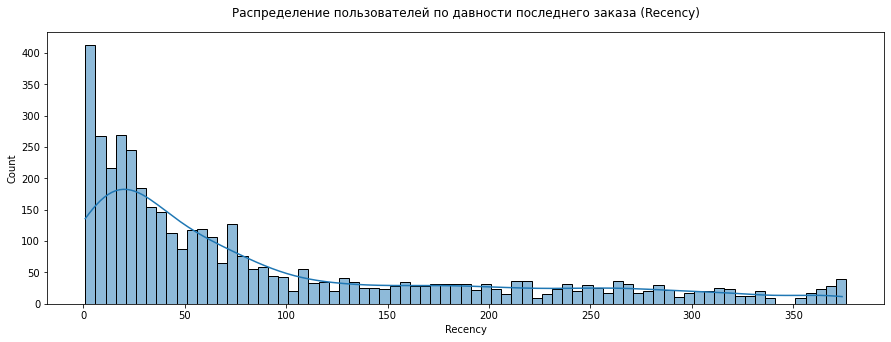

In [67]:
plt.figure(figsize=(15,5))
plt.title('Распределение пользователей по давности последнего заказа (Recency)', pad=15)
sns.histplot(data=customers, x='Recency', binwidth=5, kde=True)
plt.show()

In [68]:
customers.Recency.quantile([0,0.33,0.5,0.67,0.8,1])

0.00      1.0
0.33     25.0
0.50     52.0
0.67     94.0
0.80    183.0
1.00    374.0
Name: Recency, dtype: float64

По показателю Recency разделим по квантилям на 3 равные части.

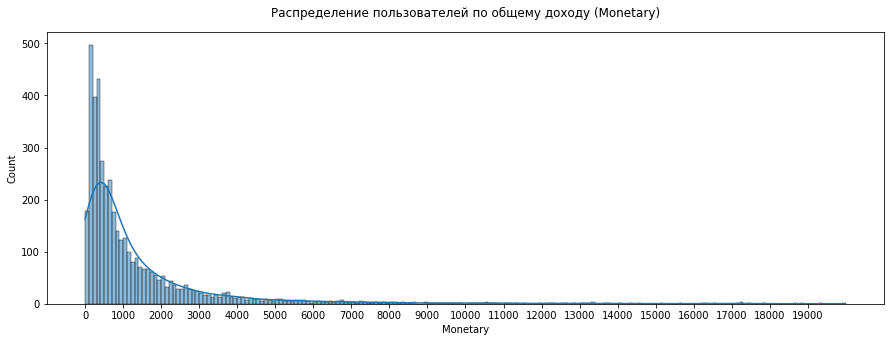

In [69]:
plt.figure(figsize=(15,5))
plt.title('Распределение пользователей по общему доходу (Monetary)', pad=15)
sns.histplot(data=customers, x='Monetary', binwidth=100, kde=True)
plt.xticks(range(0,20000,1000))
plt.show()

In [70]:
customers.Monetary.quantile([0,0.33,0.5,0.67,0.8,1])

0.00        2.900
0.33      376.936
0.50      655.750
0.67     1141.476
0.80     1931.250
1.00    19914.440
Name: Monetary, dtype: float64

По показателю Monetary также разделим по квантилям на 3 равные части.

In [71]:
def frequency_score(x):
    if x < 3:
        return 1
    if x > 5:
        return 3
    else:
        return 2

In [72]:
customers['recency_score'] = pd.qcut(customers['Recency'],3,labels = [3, 2, 1])
customers['frequency_score'] = customers['Frequency'].apply(lambda x: frequency_score(x))
customers['monetary_score'] = pd.qcut(customers['Monetary'],3,labels = [1,2,3])
customers['RFM_SCORE'] = customers['recency_score'].astype(str) + customers['frequency_score'].astype(str) +\
customers['monetary_score'].astype(str)

customers['recency_descr'] = pd.qcut(customers['Recency'],3,labels = ['недавние', 'спящие', 'давние'])
customers['frequency_descr'] = customers['Frequency'].apply(lambda x: frequency_score(x))\
.replace({1:'разовые',2:'редкие',3:'частые'})
customers['monetary_descr'] = pd.qcut(customers['Monetary'],3,
                                      labels = ['с низким общим чеком','со средним общим чеком',
                                                'с высоким общим чеком'])
customers['RFM_DESCR'] = customers.recency_descr.astype(str) + ' ' + customers.frequency_descr.astype(str) + ' ' +\
customers.monetary_descr.astype(str)
customers.head()

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   
1       12348 2010-12-16 19:09:00 2011-09-25 13:13:00          283       75   
2       12349 2011-11-21 09:51:00 2011-11-21 09:51:00            1       19   
3       12350 2011-02-02 16:01:00 2011-02-02 16:01:00            1      310   
4       12352 2011-02-16 12:33:00 2011-11-03 14:37:00          261       36   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
0          7   4310.00                52.29                   615.71   
1          4   1797.24                70.75                   449.31   
2          1   1457.55                 1.00                  1457.55   
3          1    334.40                 1.00                   334.40   
4          7   1665.74                37.29                   237.96   

  recency_score  frequency_score monetary_score RFM_SCORE recency_descr  \
0             3                3              3       333      недавние   
1             2                2              3       223        спящие   
2             3                1              3       313      недавние   
3             1                1              1       111        давние   
4             2                3              3       233        спящие   

  frequency_descr         monetary_descr  \
0          частые  с высоким общим чеком   
1          редкие  с высоким общим чеком   
2         разовые  с высоким общим чеком   
3         разовые   с низким общим чеком   
4          частые  с высоким общим чеком   

                                RFM_DESCR  
0   недавние частые с высоким общим чеком  
1     спящие редкие с высоким общим чеком  
2  недавние разовые с высоким общим чеком  
3     давние разовые с низким общим чеком  
4     спящие частые с высоким общим чеком

In [73]:
s = customers['RFM_DESCR'].value_counts(normalize=1).mul(100).reset_index()\
.rename(columns={'index':'RFM-сегмент','RFM_DESCR':'%'})
result = s.nlargest(10, columns='%')
result.loc[len(result)] = ['Прочие', s.loc[~s['RFM-сегмент'].isin(result['RFM-сегмент']), '%'].sum()]
result['cum_%'] = result['%'].cumsum()
pd.options.display.float_format = '{:,.1f}'.format
result

RFM-сегмент    %  cum_%
0      давние разовые с низким общим чеком 17.8   17.8
1    недавние частые с высоким общим чеком 12.2   30.0
2      спящие разовые с низким общим чеком  8.8   38.7
3    давние разовые со средним общим чеком  8.2   46.9
4    спящие разовые со средним общим чеком  8.0   54.9
5    недавние редкие с высоким общим чеком  5.7   60.6
6    недавние разовые с низким общим чеком  5.4   66.0
7      спящие редкие с высоким общим чеком  5.4   71.4
8   недавние редкие со средним общим чеком  4.7   76.1
9     спящие редкие со средним общим чеком  4.4   80.5
10                                  Прочие 19.5  100.0

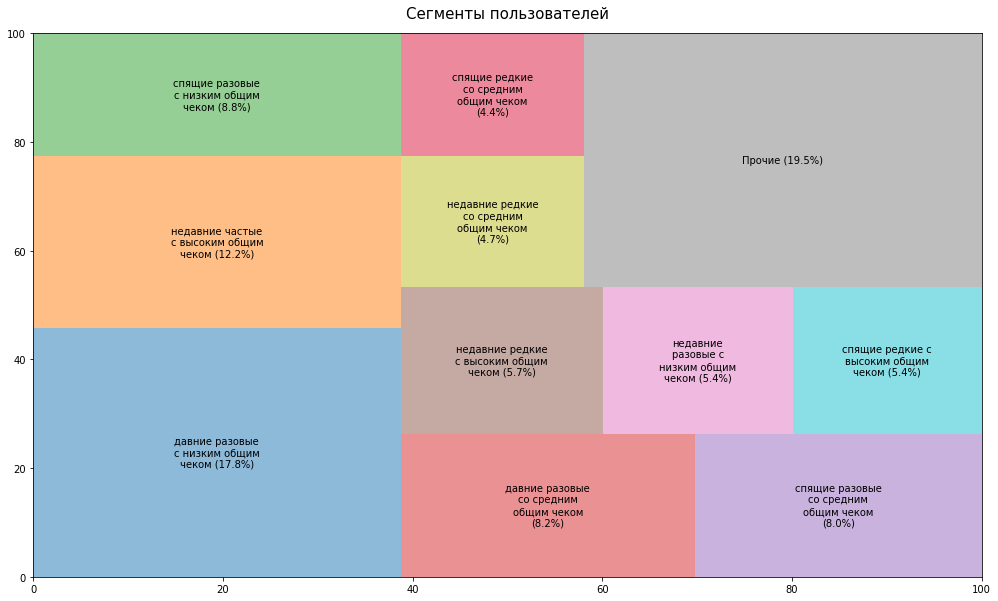

In [74]:
segments = result.iloc[:,:2]
fig = plt.gcf()
fig.set_size_inches(17, 10)
ax=squarify.plot(sizes=segments['%'],
              label=(segments['RFM-сегмент'].astype(str)+' ('+segments["%"].round(1).astype(str)+'%)')\
              .apply(lambda x: textwrap.fill(x,15)),
              color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
                     'tab:pink','tab:cyan','tab:olive','crimson','tab:gray'],
              pad = 0,
              bar_kwargs = {'alpha': 0.5})
plt.title("Сегменты пользователей", fontsize = 15, pad=15)
#plt.axis('off')
#ax.patch.set_edgecolor('black')  
#ax.patch.set_linewidth('1')  
plt.show()

Действия по каждому RFM-сегменту были разрботаны на основе [статьи](https://www.unisender.com/ru/blog/idei/rfm-analiz/), со своими дополнениями. Подтянем их

In [75]:
RFM_actions = pd.read_csv('C:\\Users\Михаил\Desktop\Data analysis\Проекты\Marketing analysis\RFM_actions.csv',
                          sep=';', dtype={'RFM_SCORE': 'str'})
customers = customers.merge(RFM_actions, how='left', on='RFM_SCORE')
customers.head(3)

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   
1       12348 2010-12-16 19:09:00 2011-09-25 13:13:00          283       75   
2       12349 2011-11-21 09:51:00 2011-11-21 09:51:00            1       19   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
0          7   4,310.0                 52.3                    615.7   
1          4   1,797.2                 70.8                    449.3   
2          1   1,457.5                  1.0                  1,457.5   

  recency_score  frequency_score monetary_score RFM_SCORE recency_descr  \
0             3                3              3       333      недавние   
1             2                2              3       223        спящие   
2             3                1              3       313      недавние   

  frequency_descr         monetary_descr  \
0          частые  с высоким общим чеком   
1          редкие  с высоким общим чеком   
2         разовые  с высоким общим чеком   

                                RFM_DESCR  \
0   недавние частые с высоким общим чеком   
1     спящие редкие с высоким общим чеком   
2  недавние разовые с высоким общим чеком   

                                              action  
0    предлагаем бонусы в рамках программы лояльности  
1  рассылки с интересными акциями и выгодными пре...  
2  welcome-цепочка, предложение бонусов за будущи...

### 2.2. Доп.анализ по частоте заказов с дополнением к маркетинговым активностям

Для более детального анализа возьмем относительные показатели по клиентам: количество дней на один заказ и средний чек на один заказ. Ограничимся клиентами, сделавшими более 3 заказов (45.5% клиентов), так как в случае меньшего числа заказов относительные показатели слишком смещены.

Рассмотрим распределение по каждому из данных параметров.

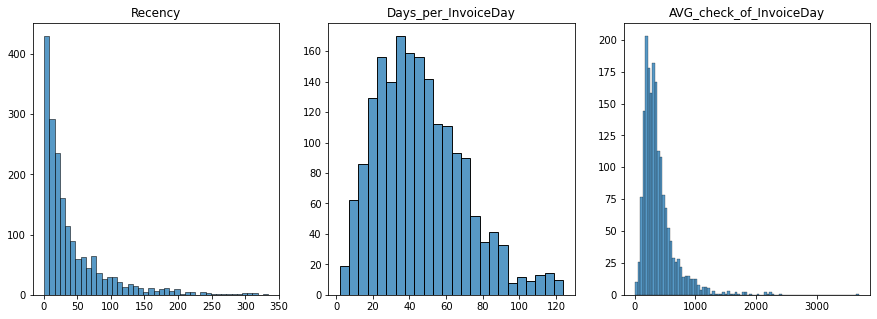

In [76]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
col = ['Recency','Days_per_InvoiceDay','AVG_check_of_InvoiceDay']
for i in range(3):
    sns.histplot(data=customers.query('Frequency > 2'), x=col[i], ax=ax[i])
    ax[i].set_title(col[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
plt.show()

Рассмотрим числовые параметры распределений.

In [77]:
customers.query('Frequency > 2')[['Recency', 'Days_per_InvoiceDay','AVG_check_of_InvoiceDay']]\
.quantile([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

0.0   0.2   0.5   0.8   0.9     1.0     1.0
Recency                  1.0   9.0  23.0  57.0 156.4   249.9   334.0
Days_per_InvoiceDay      2.0  27.8  42.8  59.9  89.0   114.7   124.0
AVG_check_of_InvoiceDay  9.1 214.0 324.7 466.2 932.0 1,557.8 3,690.9

Среди клиентов, совершивших минимум 3 заказа, половина совершала заказы не реже 1 раза в ~43 дня.

Рассмотрим распределение клиентов, совершивших минимум 3 заказа, по осям давности последнего заказа и среднему количеству дней на 1 заказ с учетом размера среднего чека на 1 заказ.

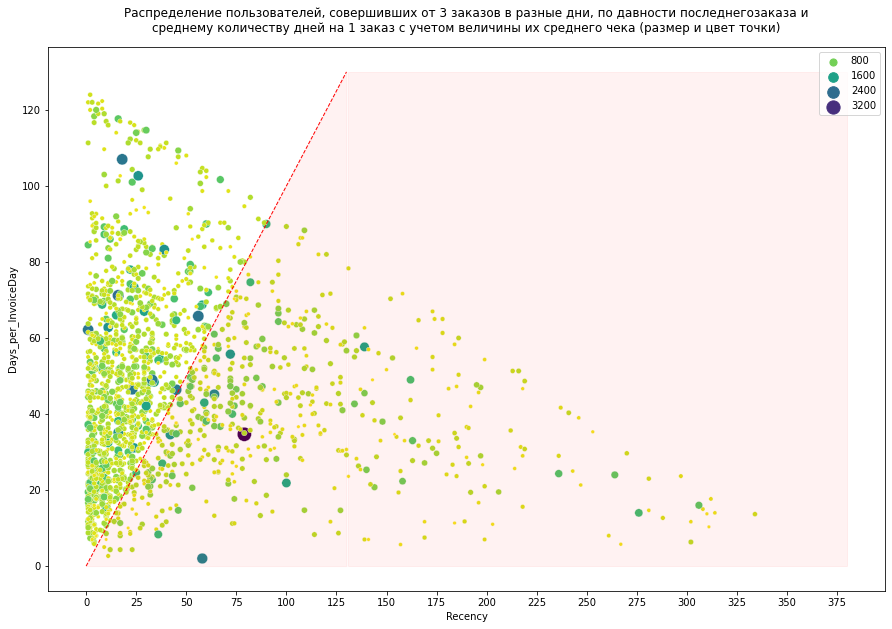

In [78]:
plt.figure(figsize=(15,10))
plt.title(textwrap.fill('Распределение пользователей, совершивших от 3 заказов в разные дни, по давности последнего\
заказа и среднему количеству дней на 1 заказ с учетом величины их среднего чека (размер и цвет точки)', 100), pad=15)
sns.scatterplot(data=customers.query('Frequency > 2'), x='Recency', y='Days_per_InvoiceDay', 
                hue='AVG_check_of_InvoiceDay', palette='viridis_r',
                size='AVG_check_of_InvoiceDay', sizes=(10,200))
sns.lineplot(x=[0, 130], y=[0, 130], linewidth=1, color='red', linestyle='--')
plt.fill_between(x=[0, 130], y1=[0, 130],color='red',alpha=0.05)
plt.fill_between(x=[131, 380], y1=[130, 130],color='red',alpha=0.05)
plt.xticks(range(0,400,25))
#plt.yticks(range(0,135,10))
plt.show()

На графике выделена область, где находятся пользователи, не делавшие заказы дольше их среднего количества дней на 1 заказ, их необходимо прогревать, чтобы ритмичность покупок не падала. Нетрудно заметить, что среди них есть клиенты с высоким и очень высоким средним чеком (крупные жирные точки), ими нужно заняться в первую очередь.

Присвоим соответствующий признак таким клиентам.

In [79]:
customers['frequency_dynamics'] = customers.apply(lambda df: 'с убывающей ритмичностью покупок' if df.Frequency > 2 
                                                  and df.Recency > df.Days_per_InvoiceDay else '', 1)

Рассмотрим соотношение таких клиентов по RFM-сегментам.

In [80]:
customers.query('frequency_dynamics == "с убывающей ритмичностью покупок"').RFM_DESCR.value_counts()

давние редкие со средним общим чеком      114
спящие частые с высоким общим чеком        98
спящие редкие с высоким общим чеком        95
давние редкие с высоким общим чеком        70
спящие редкие со средним общим чеком       62
давние частые с высоким общим чеком        25
давние редкие с низким общим чеком         18
спящие редкие с низким общим чеком         11
недавние частые с высоким общим чеком      11
недавние редкие со средним общим чеком     11
спящие частые со средним общим чеком       10
недавние редкие с высоким общим чеком       7
давние частые со средним общим чеком        7
недавние редкие с низким общим чеком        4
давние частые с низким общим чеком          2
Name: RFM_DESCR, dtype: int64

В основном это давние и спящие клиенты, маркетинговые мероприятия для которых уже определены с учетом длительного периода отсутствия. 

Но есть и недавние частые с высоким чеком, например. RFM-анализ не смог бы их выявить. Рассмотрим примеры

In [81]:
customers.query('frequency_dynamics == "с убывающей ритмичностью покупок" &\
recency_score == 3').head()

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
208       12610 2011-08-05 13:52:00 2011-11-17 09:34:00          104       23   
234       12640 2011-09-19 12:01:00 2011-11-16 11:52:00           58       24   
504       13018 2011-02-17 11:05:00 2011-11-23 13:28:00          280       16   
665       13247 2011-09-18 11:31:00 2011-11-22 10:59:00           65       18   
803       13447 2011-11-04 10:10:00 2011-11-16 13:38:00           13       23   

     Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
208          5   2,099.5                 20.8                    419.9   
234          3   1,174.6                 19.3                    391.5   
504         20   7,277.7                 14.0                    363.9   
665          4     501.1                 16.2                    125.3   
803          3   1,129.1                  4.3                    376.4   

    recency_score  frequency_score monetary_score RFM_SCORE recency_descr  \
208             3                2              3       323      недавние   
234             3                2              3       323      недавние   
504             3                3              3       333      недавние   
665             3                2              2       322      недавние   
803             3                2              2       322      недавние   

    frequency_descr          monetary_descr  \
208          редкие   с высоким общим чеком   
234          редкие   с высоким общим чеком   
504          частые   с высоким общим чеком   
665          редкие  со средним общим чеком   
803          редкие  со средним общим чеком   

                                  RFM_DESCR  \
208   недавние редкие с высоким общим чеком   
234   недавние редкие с высоким общим чеком   
504   недавние частые с высоким общим чеком   
665  недавние редкие со средним общим чеком   
803  недавние редкие со средним общим чеком   

                                                action  \
208    предлагаем бонусы в рамках программы лояльности   
234    предлагаем бонусы в рамках программы лояльности   
504    предлагаем бонусы в рамках программы лояльности   
665  рассылки с интересными акциями, сопутствующими...   
803  рассылки с интересными акциями, сопутствующими...   

                   frequency_dynamics  
208  с убывающей ритмичностью покупок  
234  с убывающей ритмичностью покупок  
504  с убывающей ритмичностью покупок  
665  с убывающей ритмичностью покупок  
803  с убывающей ритмичностью покупок

Для этих клиентов необходимо особо подчеркнуть ограниченный срок предлагаемых акций и бонусов, чтобы они поторопились.

In [82]:
customers.loc[(customers.frequency_dynamics == "с убывающей ритмичностью покупок") &\
(customers.recency_score == 3), 'action'] = customers.action + ' с минимальным сроком'

## 3. Когортный анализ

Подготовим данные для визуализации.

In [83]:
data_clean.InvoiceDate.apply(['min','max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

Оставим только полные месяцы, чтобы заниженные значения по неполным месяцам не зашумляли картину.

In [84]:
#оставляем только информацию о клиентах и месяцах, в которые они делали заказы
data = data_clean[['CustomerID', 'InvoiceDate']].query('InvoiceDate <= @pd.to_datetime("2011-12-01")')
data['InvoiceDate'] = data['InvoiceDate'].transform(lambda x: x.dt.to_period('M'))
data = data.drop_duplicates()
#добавляем информацию о когортах клиентов, как минимальных месяцах заказов
data['cohort'] = data.groupby('CustomerID')['InvoiceDate']\
.transform('min')
#агрегируем данные о количестве клиентов по когортам и месяцам заказа
cohort_data = data.groupby(['cohort', 'InvoiceDate'], as_index=0)\
.agg(n_customers=('CustomerID', 'count'))
#вычисляем номер месяца покупки по когортам как разницу между месяцем покупки и месяцем когорты
cohort_data['period_number'] = (cohort_data.InvoiceDate - cohort_data.cohort).apply(lambda x: x.n)
#формируем сводную таблицу по когортам и номерам месяцев со значениями количества клиентов
cohort_pivot = cohort_data.pivot_table(index = 'cohort',
                                       columns = 'period_number',
                                       values = 'n_customers')
cohort_pivot

period_number    0     1     2     3     4     5     6     7     8     9   \
cohort                                                                      
2010-12       842.0 293.0 252.0 300.0 290.0 317.0 289.0 274.0 279.0 315.0   
2011-01       407.0  90.0 109.0  92.0 130.0 116.0  99.0  97.0 122.0 132.0   
2011-02       375.0  70.0  70.0 106.0 101.0  90.0  96.0 104.0  92.0 115.0   
2011-03       451.0  67.0 113.0  90.0 101.0  75.0 120.0 104.0 125.0   NaN   
2011-04       300.0  63.0  61.0  63.0  59.0  68.0  65.0  78.0   NaN   NaN   
2011-05       279.0  52.0  48.0  49.0  59.0  63.0  74.0   NaN   NaN   NaN   
2011-06       242.0  42.0  38.0  64.0  54.0  80.0   NaN   NaN   NaN   NaN   
2011-07       186.0  34.0  38.0  41.0  50.0   NaN   NaN   NaN   NaN   NaN   
2011-08       165.0  33.0  41.0  40.0   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09       297.0  69.0  89.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10       355.0  85.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11       322.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

period_number    10    11  
cohort                     
2010-12       299.0 409.0  
2011-01       146.0   NaN  
2011-02         NaN   NaN  
2011-03         NaN   NaN  
2011-04         NaN   NaN  
2011-05         NaN   NaN  
2011-06         NaN   NaN  
2011-07         NaN   NaN  
2011-08         NaN   NaN  
2011-09         NaN   NaN  
2011-10         NaN   NaN  
2011-11         NaN   NaN

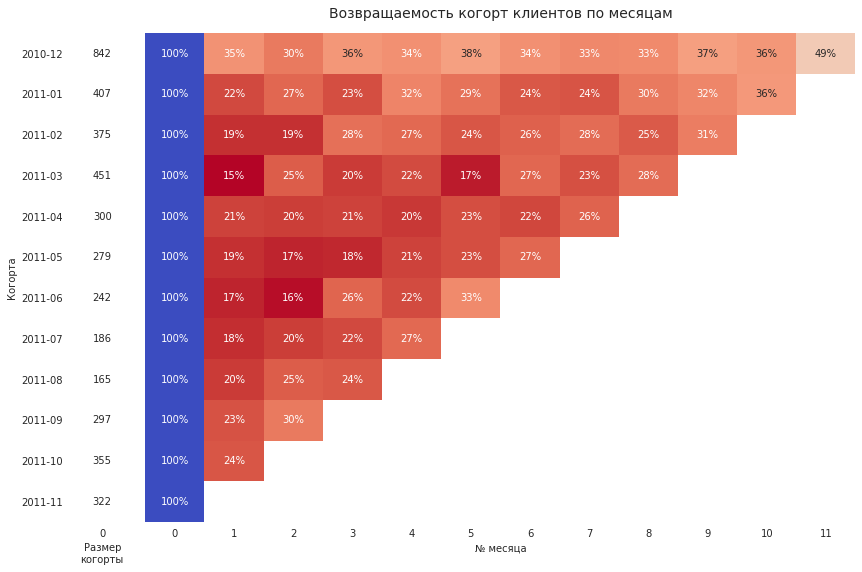

In [85]:
#рассчитываем проценты возвращаемости по когортам  
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
#и визуализируем с помощью тепловой диаграммы
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8),
                    sharey=True,
                    gridspec_kw={'width_ratios': [1, 11]})
    sns.heatmap(retention_matrix, 
                mask = retention_matrix.isnull(), 
                annot = True,
                cbar = False,
                fmt='.0%', 
                cmap='coolwarm_r', ax=ax[1])
    ax[1].set_title('Возвращаемость когорт клиентов по месяцам', fontsize=14, pad=15)
    ax[1].set(xlabel='№ месяца',
              ylabel='')
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(pd.DataFrame(cohort_size), 
                annot=True, 
                cbar = False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])
    ax[0].set(xlabel=textwrap.fill('Размер когорты', 8),
              ylabel='Когорта')
    fig.tight_layout()

1. Стабильно высокие показатели возвращаемости у клиентов первой когорты с первой покупкой в декабре 2010 года. Почти половина из них вернулась в ноябре 2011 года, а в течение года показатель возвращаемости составлял 30-40 %. Если в декабре 2010 года проводилась рождественская акция, ее можно считать очень успешной.
2. Самые низкие средние показатели возвращеаемости у когорт весенних месяцев, нужно проанализировать маркетинговые кампании этих периодов, чтобы выявить причины столь низкой возвращаемости.

## 4. Доп.сегментация по покупательскому поведению

Принимая во внимание, что день отчета приходится на рождествеский период, целесообразнее всего в рамках текущих промо-кампаний предлагать клиентам товары, которые пользуются спросом в текущий рождественский период у пользователей со сходными соц.дем. характеристиками и покупательским поведением.

In [86]:
day_of_report

Timestamp('2011-12-10 12:50:00')

Какие общие характеристики пользователей у нас уже есть:
- страна

Какие характеристики покупательского поведения мы можем получить из данных:
- средний чек (необходимо сегментировать)
- товары какой ценовой категории выбирает клиент

RFM-параметры в данном анализе не участвуют.

Разделим клиентов на сегменты по среднему чеку.

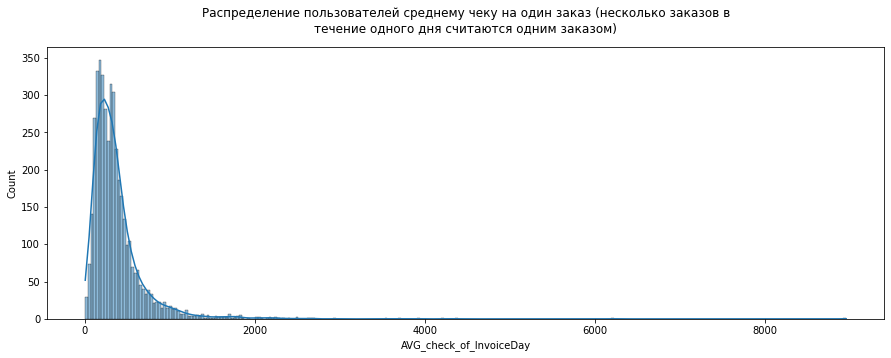

In [87]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей среднему чеку на один заказ (несколько заказов в течение \
одного дня считаются одним заказом)', 80), pad=15)
sns.histplot(data=customers, x='AVG_check_of_InvoiceDay', kde=True)
#plt.xticks(range(0,20000,1000))
plt.show()

А теперь без выбросов.

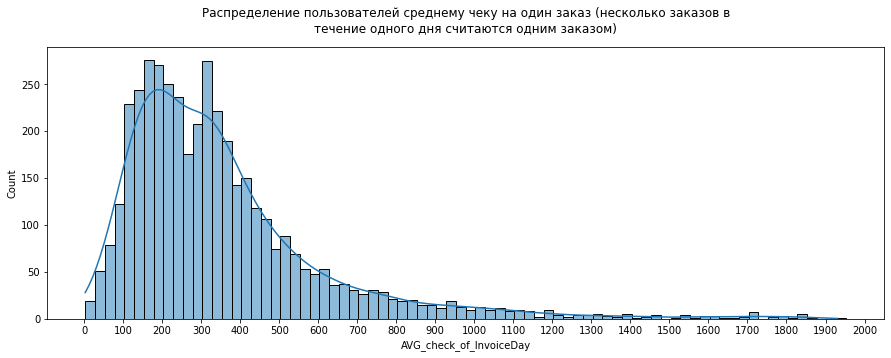

In [88]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей среднему чеку на один заказ (несколько заказов в течение \
одного дня считаются одним заказом)', 80), pad=15)
sns.histplot(data=customers.query('AVG_check_of_InvoiceDay < 2000'),
             x='AVG_check_of_InvoiceDay', binwidth=25, kde=True)
plt.xticks(range(0,2000+1,100))
plt.show()

На основании формы распределения проглядывается 4 сегмента:
1) < 250\
2) 250-400\
3) 400-1000\
4) >1000

In [89]:
def AVG_check_seg(x):
    if x < 250:
        return 'с низким средним чеком'
    if 250 <= x < 400:
        return 'с умеренным средним чеком'
    if 400 <= x < 1000:
        return 'с высоким средним чеком'
    else:
        return 'с очень высоким средним чеком'

In [90]:
customers['AVG_check_seg'] = customers.AVG_check_of_InvoiceDay.apply(lambda x: AVG_check_seg(x))

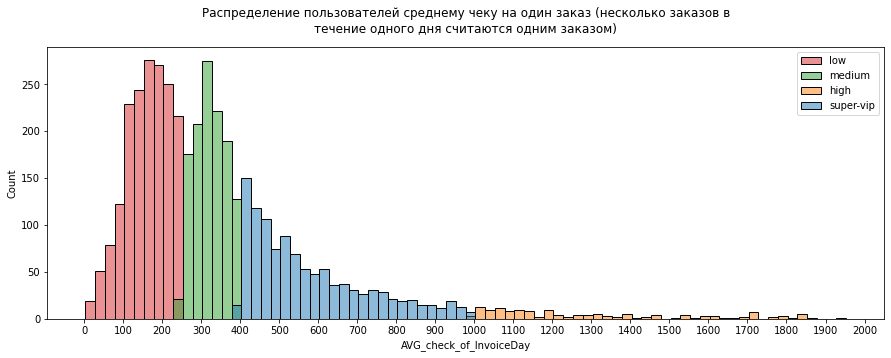

In [91]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей среднему чеку на один заказ (несколько заказов в течение \
одного дня считаются одним заказом)', 80), pad=15)
sns.histplot(data=customers.query('AVG_check_of_InvoiceDay < 2000'),
             x='AVG_check_of_InvoiceDay', binwidth=25, hue='AVG_check_seg')
plt.xticks(range(0,2000+1,100))
plt.legend(labels=['low','medium','high','super-vip'])
plt.show()

In [92]:
customers.AVG_check_seg.value_counts(normalize=1).mul(100).round(1).apply(str) + '%'

с низким средним чеком           41.3%
с умеренным средним чеком        28.6%
с высоким средним чеком          26.0%
с очень высоким средним чеком     4.2%
Name: AVG_check_seg, dtype: object

Ранее в ходе разведывательного анализа были выявлены самые популярные товары по месяцам, и в уже октябре-ноябре 2011 года самым популярным оказались рождественские товары: рождественская цепочка из бумажных колец и ночник в виде кролика. Значит подготовка к рождеству начинается уже в эти месяцы. Чтобы предлагать наиболее горячие товары, возьмем период за последний месяц: с 12 ноября до 12 декабря (дата окончания сбора данных) и рассмотрим самые популярные позиции у пользователей из разных сегментов по среднему чеку на заказ (несколько заказов в течение одного дня считаются одним заказом). Эти позиции пользуются высоким спросом, поэтому на них можно сделать скидку.

In [93]:
data_clean.query('InvoiceDate >= @pd.to_datetime("2011-11-12")')\
.merge(customers[['CustomerID','AVG_check_seg']], how='left', on='CustomerID')\
.groupby(['AVG_check_seg', 'Description']).agg(n_purchase=('InvoiceNo','count'))\
.reset_index().sort_values(['AVG_check_seg','n_purchase'], ascending=[1,0]).groupby('AVG_check_seg').head(3)

AVG_check_seg                        Description  \
1417        с высоким средним чеком                 RABBIT NIGHT LIGHT   
1249        с высоким средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
1254        с высоким средним чеком  PAPER CHAIN KIT VINTAGE CHRISTMAS   
3561         с низким средним чеком                 RABBIT NIGHT LIGHT   
3392         с низким средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
3677         с низким средним чеком       REX CASH+CARRY JUMBO SHOPPER   
4705  с очень высоким средним чеком         HOT WATER BOTTLE KEEP CALM   
4727  с очень высоким средним чеком           JAM MAKING SET WITH JARS   
4960  с очень высоким средним чеком                 RABBIT NIGHT LIGHT   
6698      с умеренным средним чеком                 RABBIT NIGHT LIGHT   
6545      с умеренным средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
6164      с умеренным средним чеком         HOT WATER BOTTLE KEEP CALM   

      n_purchase  
1417         131  
1249         115  
1254          86  
3561          85  
3392          80  
3677          71  
4705          13  
4727          12  
4960          12  
6698         117  
6545          81  
6164          60

Исключим подарочные пакеты и сумки, так как было бы странно их предлагать.

In [94]:
data_clean[(data_clean.InvoiceDate >= pd.to_datetime("2011-11-12")) & \
(data_clean.Description.str.contains("SHOPPER|BAG", regex=1) == False)]\
.merge(customers[['CustomerID','AVG_check_seg']], how='left', on='CustomerID')\
.groupby(['AVG_check_seg', 'Description']).agg(n_purchase=('InvoiceNo','count'))\
.reset_index().sort_values(['AVG_check_seg','n_purchase'], ascending=[1,0]).groupby('AVG_check_seg').head(3)

AVG_check_seg                        Description  \
1338        с высоким средним чеком                 RABBIT NIGHT LIGHT   
1178        с высоким средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
1183        с высоким средним чеком  PAPER CHAIN KIT VINTAGE CHRISTMAS   
3376         с низким средним чеком                 RABBIT NIGHT LIGHT   
3213         с низким средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
2881         с низким средним чеком         HOT WATER BOTTLE KEEP CALM   
4473  с очень высоким средним чеком         HOT WATER BOTTLE KEEP CALM   
4495  с очень высоким средним чеком           JAM MAKING SET WITH JARS   
4690  с очень высоким средним чеком                 RABBIT NIGHT LIGHT   
6341      с умеренным средним чеком                 RABBIT NIGHT LIGHT   
6194      с умеренным средним чеком    PAPER CHAIN KIT 50'S CHRISTMAS    
5852      с умеренным средним чеком         HOT WATER BOTTLE KEEP CALM   

      n_purchase  
1338         131  
1178         115  
1183          86  
3376          85  
3213          80  
2881          69  
4473          13  
4495          12  
4690          12  
6341         117  
6194          81  
5852          60

Между сегментами есть различия в самых популярных товарах, однако немало и общих позиций.

Рассмотрим, насколько дорогие товары могут позволить себе клиенты. Для этого вычислим сумму цен 3 самых дорогих купленных товаров по каждому клиенту. Таким образом, если клиент покупал дорогой товар только в одном экземпляре, его показатель будет ниже, чем у клиента, покупавшего чуть менее дорогой товар, но несколько раз. Это даст более точный показатель готовности покупать дорогие товары в нашем магазине.

In [95]:
s = data_clean.sort_values(['CustomerID','UnitPrice'], ascending=[1,0]).groupby('CustomerID').head(3)\
.groupby('CustomerID', as_index=0).agg(UnitPrice_top3sum=('UnitPrice','sum'))
s.head()

CustomerID  UnitPrice_top3sum
0       12347               38.2
1       12348              120.0
2       12349               68.7
3       12350               45.0
4       12352              120.0

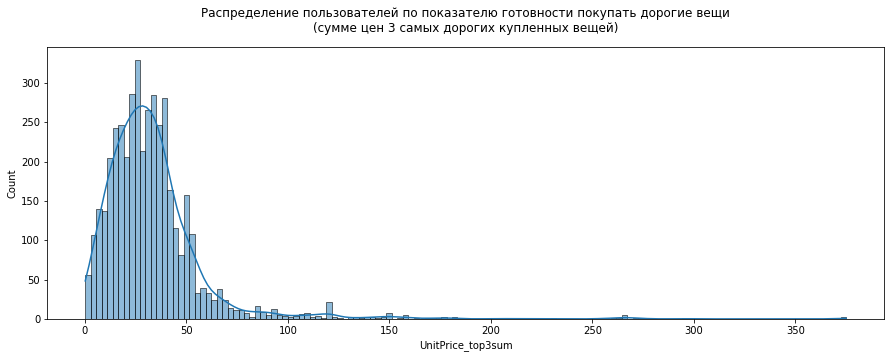

In [96]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей по показателю готовности покупать дорогие вещи \
(сумме цен 3 самых дорогих купленных вещей)', 80), pad=15)
sns.histplot(data=s, x='UnitPrice_top3sum', kde=True)
#plt.xticks(range(0,20000,1000))
plt.show()

Рассмотрим подробнее основное распределение

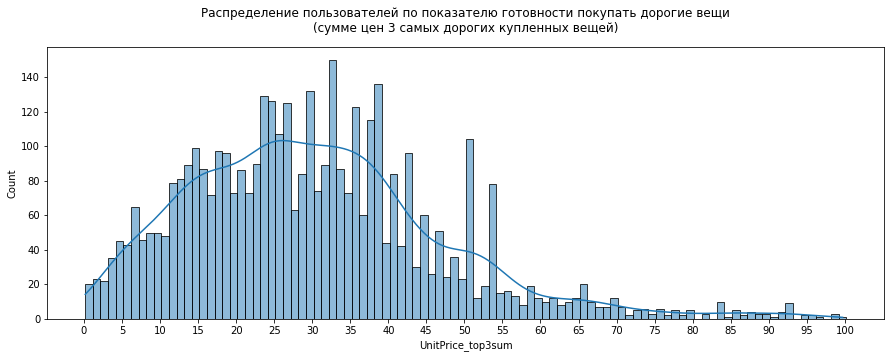

In [97]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей по показателю готовности покупать дорогие вещи \
(сумме цен 3 самых дорогих купленных вещей)', 80), pad=15)
sns.histplot(data=s.query('UnitPrice_top3sum < 100'), x='UnitPrice_top3sum', binwidth=1, kde=True)
plt.xticks(range(0,100+1,5))
plt.show()

На основании формы распределения проглядывается 4 сегмента:
1) < 20\
2) 20-40\
3) 40-80\
4) >80

In [98]:
def top3_price_seg(x):
    if x < 20:
        return 'предпочитают дешевые товары'
    if 20 <= x < 40:
        return 'покупают товары средней стоимости'
    if 40 <= x < 80:
        return 'покупают дорогие товары'
    else:
        return 'покупают очень дорогие товары'

In [99]:
s['top3_price_seg'] = s.UnitPrice_top3sum.apply(lambda x: top3_price_seg(x))
s.head(1)

CustomerID  UnitPrice_top3sum                     top3_price_seg
0       12347               38.2  покупают товары средней стоимости

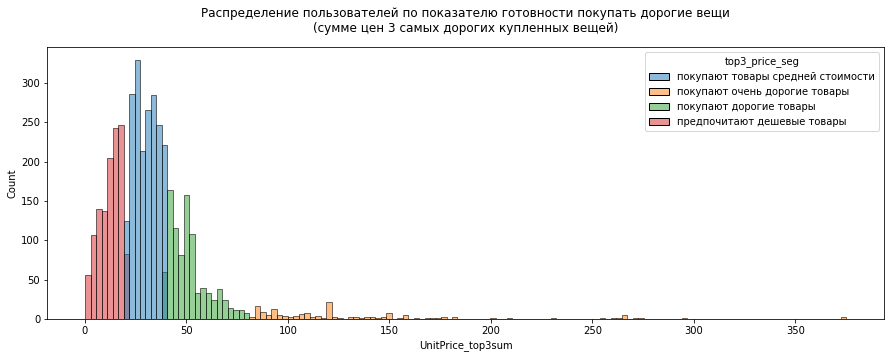

In [100]:
plt.figure(figsize=(15,5))
plt.title(textwrap.fill('Распределение пользователей по показателю готовности покупать дорогие вещи \
(сумме цен 3 самых дорогих купленных вещей)', 80), pad=15)
sns.histplot(data=s, x='UnitPrice_top3sum', hue='top3_price_seg')
#plt.xticks(range(0,20000,1000))
plt.show()

In [101]:
s.top3_price_seg.value_counts(normalize=1).mul(100).round(1).apply(str) + '%'

покупают товары средней стоимости    46.3%
предпочитают дешевые товары          28.5%
покупают дорогие товары              21.6%
покупают очень дорогие товары         3.7%
Name: top3_price_seg, dtype: object

Рассмотрим топ товаров для данных сегментов.

In [102]:
data_clean[(data_clean.InvoiceDate >= pd.to_datetime("2011-11-12")) & \
(data_clean.Description.str.contains("SHOPPER|BAG", regex=1) == False)]\
.merge(s[['CustomerID','top3_price_seg']], how='left', on='CustomerID')\
.groupby(['top3_price_seg', 'Description']).agg(n_purchase=('InvoiceNo','count'))\
.reset_index().sort_values(['top3_price_seg','n_purchase'], ascending=[1,0]).groupby('top3_price_seg').head(3)

top3_price_seg                        Description  \
1366            покупают дорогие товары                 RABBIT NIGHT LIGHT   
1349            покупают дорогие товары                            POSTAGE   
1207            покупают дорогие товары    PAPER CHAIN KIT 50'S CHRISTMAS    
2638      покупают очень дорогие товары                            POSTAGE   
2643      покупают очень дорогие товары                 RABBIT NIGHT LIGHT   
2453      покупают очень дорогие товары         HOT WATER BOTTLE KEEP CALM   
4402  покупают товары средней стоимости                 RABBIT NIGHT LIGHT   
4237  покупают товары средней стоимости    PAPER CHAIN KIT 50'S CHRISTMAS    
4242  покупают товары средней стоимости  PAPER CHAIN KIT VINTAGE CHRISTMAS   
5955        предпочитают дешевые товары    PAPER CHAIN KIT 50'S CHRISTMAS    
5264        предпочитают дешевые товары      BAKING SET 9 PIECE RETROSPOT    
6066        предпочитают дешевые товары                 RABBIT NIGHT LIGHT   

      n_purchase  
1366         145  
1349         114  
1207         110  
2638          21  
2643          18  
2453          15  
4402         154  
4237         132  
4242          92  
5955          31  
5264          28  
6066          28

Почтовые расходы тоже исключим.

In [103]:
data_clean[(data_clean.InvoiceDate >= pd.to_datetime("2011-11-12")) & \
(data_clean.Description.str.contains("SHOPPER|BAG|POSTAGE", regex=1) == False)]\
.merge(s[['CustomerID','top3_price_seg']], how='left', on='CustomerID')\
.groupby(['top3_price_seg', 'Description']).agg(n_purchase=('InvoiceNo','count'))\
.reset_index().sort_values(['top3_price_seg','n_purchase'], ascending=[1,0]).groupby('top3_price_seg').head(3)

top3_price_seg                        Description  \
1365            покупают дорогие товары                 RABBIT NIGHT LIGHT   
1207            покупают дорогие товары    PAPER CHAIN KIT 50'S CHRISTMAS    
851             покупают дорогие товары         HOT WATER BOTTLE KEEP CALM   
2641      покупают очень дорогие товары                 RABBIT NIGHT LIGHT   
2452      покупают очень дорогие товары         HOT WATER BOTTLE KEEP CALM   
2575      покупают очень дорогие товары    PAPER CHAIN KIT 50'S CHRISTMAS    
4399  покупают товары средней стоимости                 RABBIT NIGHT LIGHT   
4235  покупают товары средней стоимости    PAPER CHAIN KIT 50'S CHRISTMAS    
4240  покупают товары средней стоимости  PAPER CHAIN KIT VINTAGE CHRISTMAS   
5952        предпочитают дешевые товары    PAPER CHAIN KIT 50'S CHRISTMAS    
5261        предпочитают дешевые товары      BAKING SET 9 PIECE RETROSPOT    
6063        предпочитают дешевые товары                 RABBIT NIGHT LIGHT   

      n_purchase  
1365         145  
1207         110  
851           99  
2641          18  
2452          15  
2575          13  
4399         154  
4235         132  
4240          92  
5952          31  
5261          28  
6063          28

Также немало общих позиций, но есть и значимые отличия.

Можно было бы еще присвоить пользователям любимые категории товаров, предварительно выделив эти категории с помощью кластеризации названий товаров методами NLP. Но подарки и украшения очень изменчивы в зависимости от повода, поэтому большого смысла в дополнительном сужении сегментов по этому признаку не будет.

Подтянем признак к массиву клиентов.

In [104]:
customers = customers.merge(s[['CustomerID','top3_price_seg']], how='left', on='CustomerID')
customers.head(1)

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
0          7   4,310.0                 52.3                    615.7   

  recency_score  ...  monetary_score RFM_SCORE recency_descr frequency_descr  \
0             3  ...               3       333      недавние          частые   

          monetary_descr                              RFM_DESCR  \
0  с высоким общим чеком  недавние частые с высоким общим чеком   

                                            action frequency_dynamics  \
0  предлагаем бонусы в рамках программы лояльности                      

             AVG_check_seg                     top3_price_seg  
0  с высоким средним чеком  покупают товары средней стоимости  

[1 rows x 21 columns]

Также подтянем данные о стране клиента.

In [105]:
s = data_clean.groupby('CustomerID', as_index=0).agg({'Country':['nunique','unique']})
s.columns = [i+'_'+j if j != '' else i for i,j in s.columns]
s.query('Country_nunique > 1')

CustomerID  Country_nunique            Country_unique
19       12370                2         [Cyprus, Austria]
36       12394                2        [Belgium, Denmark]
53       12417                2          [Belgium, Spain]
57       12422                2  [Australia, Switzerland]
64       12429                2        [Denmark, Austria]
66       12431                2      [Australia, Belgium]
87       12455                2           [Cyprus, Spain]
89       12457                2     [Switzerland, Cyprus]

Несколько клиентов делали заказы из разных стран. Присвоим им страну, из которой было больше заказов.

In [106]:
customers = customers.merge(\
data_clean.groupby(['CustomerID', 'Country'], as_index=0).agg({'InvoiceNo':'nunique'})\
.sort_values('InvoiceNo', ascending=0).drop_duplicates(subset=['CustomerID'])[['CustomerID', 'Country']],\
on='CustomerID')
customers.head(1)

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
0          7   4,310.0                 52.3                    615.7   

  recency_score  ...  RFM_SCORE recency_descr frequency_descr  \
0             3  ...        333      недавние          частые   

          monetary_descr                              RFM_DESCR  \
0  с высоким общим чеком  недавние частые с высоким общим чеком   

                                            action frequency_dynamics  \
0  предлагаем бонусы в рамках программы лояльности                      

             AVG_check_seg                     top3_price_seg  Country  
0  с высоким средним чеком  покупают товары средней стоимости  Iceland  

[1 rows x 22 columns]

## 5. Подбор рекомендуемых товаров для маркетинговых акций

Теперь получим по каждому из сегментов, выделенному на основании величины среднего чека, готовности покупать дорогие товары и страны клиента, самые популярные товары, которые покупались за последний месяц. Эти товары мы рекомендуем использовать маркетологам в рамках таргетированных промо-активностей.

Мэппинг с учетом страны:

In [107]:
recom_data_country = data_clean[(data_clean.InvoiceDate >= pd.to_datetime("2011-11-12")) & \
(data_clean.Description.str.contains("SHOPPER|BAG|POSTAGE", regex=1) == False)]\
.loc[:,['CustomerID','Description']]\
.merge(customers[['CustomerID','AVG_check_seg','top3_price_seg','Country']], how='left', on='CustomerID')\
.groupby(['AVG_check_seg','top3_price_seg','Country','Description']).agg(n_purchase=('CustomerID','count'))\
.reset_index().sort_values(['AVG_check_seg','top3_price_seg','Country','n_purchase'], ascending=[1,1,0,0])\
.groupby(['AVG_check_seg','top3_price_seg','Country'], as_index=0).head(3).query('Country != "Unspecified"')\
.groupby(['AVG_check_seg','top3_price_seg','Country'], as_index=0)\
.agg(goods_to_recommend = ('Description','unique'))
recom_data_country.head(10)

AVG_check_seg           top3_price_seg         Country  \
0  с высоким средним чеком  покупают дорогие товары         Austria   
1  с высоким средним чеком  покупают дорогие товары         Belgium   
2  с высоким средним чеком  покупают дорогие товары         Denmark   
3  с высоким средним чеком  покупают дорогие товары          France   
4  с высоким средним чеком  покупают дорогие товары         Germany   
5  с высоким средним чеком  покупают дорогие товары          Greece   
6  с высоким средним чеком  покупают дорогие товары        Portugal   
7  с высоким средним чеком  покупают дорогие товары           Spain   
8  с высоким средним чеком  покупают дорогие товары     Switzerland   
9  с высоким средним чеком  покупают дорогие товары  United Kingdom   

                                  goods_to_recommend  
0  [6 GIFT TAGS VINTAGE CHRISTMAS , 3 PIECE SPACE...  
1  [ I LOVE LONDON MINI BACKPACK,  SPACEBOY BABY ...  
2  [4 LAVENDER BOTANICAL DINNER CANDLES, 4 PEAR B...  
3  [RABBIT NIGHT LIGHT, MINI LIGHTS WOODLAND MUSH...  
4  [RABBIT NIGHT LIGHT, ROUND SNACK BOXES SET OF4...  
5  [12 PENCILS TALL TUBE RED RETROSPOT, 12 PENCIL...  
6  [RABBIT NIGHT LIGHT, BAKING SET 9 PIECE RETROS...  
7  [BISCUIT TIN 50'S CHRISTMAS, CERAMIC BOWL WITH...  
8  [BOX OF VINTAGE JIGSAW BLOCKS , CARD MOTORBIKE...  
9  [PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ...

И без учета страны:

In [108]:
recom_data_world = data_clean[(data_clean.InvoiceDate >= pd.to_datetime("2011-11-12")) & \
(data_clean.Description.str.contains("SHOPPER|BAG|POSTAGE", regex=1) == False)]\
.loc[:,['CustomerID','Description']]\
.merge(customers[['CustomerID','AVG_check_seg','top3_price_seg']], how='left', on='CustomerID')\
.groupby(['AVG_check_seg','top3_price_seg','Description']).agg(n_purchase=('CustomerID','count'))\
.reset_index().sort_values(['AVG_check_seg','top3_price_seg','n_purchase'], ascending=[1,1,0])\
.groupby(['AVG_check_seg','top3_price_seg'], as_index=0).head(3)\
.groupby(['AVG_check_seg','top3_price_seg'], as_index=0)\
.agg(goods_to_recommend = ('Description','unique'))
recom_data_world.head(10)

AVG_check_seg                     top3_price_seg  \
0        с высоким средним чеком            покупают дорогие товары   
1        с высоким средним чеком      покупают очень дорогие товары   
2        с высоким средним чеком  покупают товары средней стоимости   
3        с высоким средним чеком        предпочитают дешевые товары   
4         с низким средним чеком            покупают дорогие товары   
5         с низким средним чеком      покупают очень дорогие товары   
6         с низким средним чеком  покупают товары средней стоимости   
7         с низким средним чеком        предпочитают дешевые товары   
8  с очень высоким средним чеком            покупают дорогие товары   
9  с очень высоким средним чеком      покупают очень дорогие товары   

                                  goods_to_recommend  
0  [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50'S CHRI...  
1  [PAPER CHAIN KIT 50'S CHRISTMAS , CHOCOLATE HO...  
2  [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50'S CHRI...  
3  [PAPER CHAIN KIT 50'S CHRISTMAS , VINTAGE SNAP...  
4  [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50'S CHRI...  
5  [HOT WATER BOTTLE KEEP CALM, ASSORTED COLOUR B...  
6  [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50'S CHRI...  
7  [BAKING SET 9 PIECE RETROSPOT , HAND WARMER OW...  
8  [RABBIT NIGHT LIGHT, ALARM CLOCK BAKELIKE GREE...  
9  [ALARM CLOCK BAKELIKE PINK, BLUE REFECTORY CLO...

Подтянем по каждому клиенту рекомендуемый набор товаров на основании его покупательского поведения и страны.

In [109]:
customers = customers.merge(recom_data_country, how='left', on=['AVG_check_seg','top3_price_seg','Country'])
customers.head(5)

CustomerID     InvoiceDate_min     InvoiceDate_max  Days_active  Recency  \
0       12347 2010-12-07 14:57:00 2011-12-07 15:52:00          366        2   
1       12348 2010-12-16 19:09:00 2011-09-25 13:13:00          283       75   
2       12349 2011-11-21 09:51:00 2011-11-21 09:51:00            1       19   
3       12350 2011-02-02 16:01:00 2011-02-02 16:01:00            1      310   
4       12352 2011-02-16 12:33:00 2011-11-03 14:37:00          261       36   

   Frequency  Monetary  Days_per_InvoiceDay  AVG_check_of_InvoiceDay  \
0          7   4,310.0                 52.3                    615.7   
1          4   1,797.2                 70.8                    449.3   
2          1   1,457.5                  1.0                  1,457.5   
3          1     334.4                  1.0                    334.4   
4          7   1,665.7                 37.3                    238.0   

  recency_score  ...  recency_descr frequency_descr         monetary_descr  \
0             3  ...       недавние          частые  с высоким общим чеком   
1             2  ...         спящие          редкие  с высоким общим чеком   
2             3  ...       недавние         разовые  с высоким общим чеком   
3             1  ...         давние         разовые   с низким общим чеком   
4             2  ...         спящие          частые  с высоким общим чеком   

                                RFM_DESCR  \
0   недавние частые с высоким общим чеком   
1     спящие редкие с высоким общим чеком   
2  недавние разовые с высоким общим чеком   
3     давние разовые с низким общим чеком   
4     спящие частые с высоким общим чеком   

                                              action  \
0    предлагаем бонусы в рамках программы лояльности   
1  рассылки с интересными акциями и выгодными пре...   
2  welcome-цепочка, предложение бонусов за будущи...   
3                 автоматическая цепочка реактивации   
4  рассылка с интересными акциями и рассылка с оп...   

                 frequency_dynamics                  AVG_check_seg  \
0                                          с высоким средним чеком   
1  с убывающей ритмичностью покупок        с высоким средним чеком   
2                                    с очень высоким средним чеком   
3                                        с умеренным средним чеком   
4                                           с низким средним чеком   

                      top3_price_seg  Country  \
0  покупают товары средней стоимости  Iceland   
1      покупают очень дорогие товары  Finland   
2            покупают дорогие товары    Italy   
3            покупают дорогие товары   Norway   
4      покупают очень дорогие товары   Norway   

                                  goods_to_recommend  
0  [BICYCLE PUNCTURE REPAIR KIT , BOOM BOX SPEAKE...  
1  [CHILDRENS CUTLERY POLKADOT PINK, BISCUIT TIN ...  
2  [CLASSIC CHROME BICYCLE BELL , HAND WARMER RED...  
3                                                NaN  
4                                                NaN  

[5 rows x 23 columns]

Рассмотрим строки, по которым значения не подтянулись

In [110]:
customers.query('goods_to_recommend != goods_to_recommend').Country.value_counts()

Switzerland             10
Channel Islands          8
Japan                    7
Spain                    7
Poland                   6
Belgium                  6
Finland                  6
Australia                6
Norway                   5
Portugal                 5
Austria                  5
Sweden                   4
Canada                   4
Netherlands              4
Italy                    4
Unspecified              4
Cyprus                   4
Germany                  3
Greece                   3
United Arab Emirates     2
France                   2
USA                      2
Bahrain                  2
Israel                   2
Denmark                  2
Singapore                1
Saudi Arabia             1
Lebanon                  1
Brazil                   1
Czech Republic           1
EIRE                     1
RSA                      1
European Community       1
Lithuania                1
Malta                    1
Name: Country, dtype: int64

Значения не подтянулись по редким странам или неуказанным. Таким клиентам будем рекомендовать товары, популярные у клиентов с таким же покупательским поведением в целом по всему миру.

In [111]:
customers.loc[customers.goods_to_recommend.isna(), 'goods_to_recommend'] = \
customers.merge(recom_data_world, how='left', on=['AVG_check_seg','top3_price_seg']).goods_to_recommend_y

In [112]:
customers.query('goods_to_recommend != goods_to_recommend').shape[0]

0

Осталось скорректировать данные по рекомендуемым товарам для клиентов, на основании покупок которых строились рекомендации для всего остального массива.

In [113]:
data_clean.query('InvoiceDate >= @pd.to_datetime("2011-11-12")').CustomerID.nunique() / customers.shape[0]

0.34616287256512557

Таких клиентов около трети от всего массива, и они делали заказы в последний месяц, поэтому знакомы с текущим ассортиментом и как минимум некоторые из популярных позиций большинство из них уже приобрело. Поэтому данным клиентам будем предлагать новинки в ассортименте, которые будут появляться после дня отчета 13 декабря 2011 года.

In [114]:
l = data_clean.query('InvoiceDate >= @pd.to_datetime("2011-11-12")').CustomerID.unique()
customers.loc[customers.CustomerID.isin(l), 'goods_to_recommend'] = 'new positions since 2011-12-13'

Рассмотрим примеры клиентов в финальном массиве.

In [115]:
customers = customers.loc[:,['CustomerID', 'Country', 'InvoiceDate_min', 'InvoiceDate_max', 'Days_active',
                              'Recency', 'Frequency', 'Monetary', 'recency_score', 'frequency_score',
                              'monetary_score', 'RFM_SCORE', 'RFM_DESCR', 'frequency_dynamics', 
                              'Days_per_InvoiceDay', 'AVG_check_of_InvoiceDay', 'AVG_check_seg', 
                              'top3_price_seg', 'action', 'goods_to_recommend']]
customers.iloc[[random.randint(0,customers.shape[0]-1) for i in range(5)],:]

CustomerID         Country     InvoiceDate_min     InvoiceDate_max  \
2003       15132  United Kingdom 2011-03-22 12:02:00 2011-11-21 17:10:00   
3217       16810  United Kingdom 2011-05-31 15:32:00 2011-05-31 15:32:00   
1690       14693  United Kingdom 2011-03-20 12:50:00 2011-03-20 12:50:00   
1845       14912           Italy 2011-04-07 11:06:00 2011-11-23 09:20:00   
314        12736          France 2011-01-11 07:57:00 2011-01-11 07:57:00   

      Days_active  Recency  Frequency  Monetary recency_score  \
2003          245       18          5     977.9             3   
3217            1      192          1     309.5             1   
1690            1      265          1     172.9             1   
1845          230       17          2     867.9             3   
314             1      333          1     234.0             1   

      frequency_score monetary_score RFM_SCORE  \
2003                2              2       322   
3217                1              1       111   
1690                1              1       111   
1845                1              2       312   
314                 1              1       111   

                                    RFM_DESCR frequency_dynamics  \
2003   недавние редкие со средним общим чеком                      
3217      давние разовые с низким общим чеком                      
1690      давние разовые с низким общим чеком                      
1845  недавние разовые со средним общим чеком                      
314       давние разовые с низким общим чеком                      

      Days_per_InvoiceDay  AVG_check_of_InvoiceDay              AVG_check_seg  \
2003                 49.0                    195.6     с низким средним чеком   
3217                  1.0                    309.5  с умеренным средним чеком   
1690                  1.0                    172.9     с низким средним чеком   
1845                115.0                    433.9    с высоким средним чеком   
314                   1.0                    234.0     с низким средним чеком   

                         top3_price_seg  \
2003        предпочитают дешевые товары   
3217        предпочитают дешевые товары   
1690        предпочитают дешевые товары   
1845  покупают товары средней стоимости   
314   покупают товары средней стоимости   

                                                 action  \
2003  рассылки с интересными акциями, сопутствующими...   
3217                 автоматическая цепочка реактивации   
1690                 автоматическая цепочка реактивации   
1845  welcome-цепочка, предложение бонусов за будущи...   
314                  автоматическая цепочка реактивации   

                                     goods_to_recommend  
2003                     new positions since 2011-12-13  
3217  [PAPER CHAIN KIT 50'S CHRISTMAS , RABBIT NIGHT...  
1690  [BAKING SET 9 PIECE RETROSPOT , HAND WARMER OW...  
1845                     new positions since 2011-12-13  
314   [BIRDS MOBILE VINTAGE DESIGN, BLUE SCOTTIE DOG...

## 6. Итоговые отчеты

Итоговое распределение RFM-сегментов (топ-10)

In [116]:
s = pd.concat([customers.RFM_DESCR.value_counts(), 
               customers.RFM_DESCR.value_counts(normalize=1).mul(100).round(1)],axis=1).reset_index()
s.columns=['RFM-сегмент','Количество','%']
s.head(10)

RFM-сегмент  Количество    %
0     давние разовые с низким общим чеком         757 17.8
1   недавние частые с высоким общим чеком         520 12.2
2     спящие разовые с низким общим чеком         374  8.8
3   давние разовые со средним общим чеком         348  8.2
4   спящие разовые со средним общим чеком         339  8.0
5   недавние редкие с высоким общим чеком         245  5.7
6   недавние разовые с низким общим чеком         231  5.4
7     спящие редкие с высоким общим чеком         229  5.4
8  недавние редкие со средним общим чеком         199  4.7
9    спящие редкие со средним общим чеком         186  4.4

Итоговое распределение маркетинговых мероприятий

In [117]:
pd.set_option('display.max_colwidth', 170)
s = pd.concat([customers.action.value_counts(), 
               customers.action.value_counts(normalize=1).mul(100).round(1)],axis=1).reset_index()
s.columns=['Маркетинговое действие','Количество','%']
s

Маркетинговое действие  \
0                       рассылки с интересными акциями и выгодными предложениями   
1                                             автоматическая цепочка реактивации   
2                                предлагаем бонусы в рамках программы лояльности   
3                        welcome-цепочка, предложение бонусов за будущие покупки   
4                                             реактивационная рассылка с опросом   
5                        рассылки с интересными акциями, сопутствующими товарами   
6                            рассылка с интересными акциями и рассылка с опросом   
7    рассылка с просьбой обратной связи, предлагаем бонусы, программы лояльности   
8                                           предлагаем бонусы за будущие покупки   
9           предлагаем бонусы в рамках программы лояльности с минимальным сроком   
10  рассылки с интересными акциями, сопутствующими товарами с минимальным сроком   

    Количество    %  
0         1220 28.6  
1         1176 27.6  
2          747 17.5  
3          449 10.5  
4          202  4.7  
5          201  4.7  
6          171  4.0  
7           34  0.8  
8           28  0.7  
9           18  0.4  
10          15  0.4

Итоговое распределение наборов рекомендуемых товаров (топ-10)

In [118]:
s = pd.concat([customers.goods_to_recommend.apply(str).str.replace('\n','').str.replace("'",'')\
               .str.replace(' "',', ').str.replace('"','').value_counts(), 
               customers.goods_to_recommend.apply(str).str.replace('\n','').str.replace("'",'')\
               .str.replace(' "',', ').str.replace('"','').value_counts(normalize=1)\
               .mul(100).round(1)],axis=1).reset_index()
s.columns=['Набор рекомендуемых товаров','Количество','%']
s.head(10)

Набор рекомендуемых товаров  \
0                                                                     new positions since 2011-12-13   
1            [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50S CHRISTMAS,  PAPER CHAIN KIT VINTAGE CHRISTMAS]   
2                  [BAKING SET 9 PIECE RETROSPOT  HAND WARMER OWL DESIGN HOT WATER BOTTLE KEEP CALM]   
3                  [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50S CHRISTMAS,  LARGE WHITE HEART OF WICKER]   
4             [PAPER CHAIN KIT 50S CHRISTMAS,  RABBIT NIGHT LIGHT PAPER CHAIN KIT VINTAGE CHRISTMAS]   
5                        [PAPER CHAIN KIT 50S CHRISTMAS,  VINTAGE SNAP CARDS HAND WARMER OWL DESIGN]   
6     [PAPER CHAIN KIT 50S CHRISTMAS,  PAPER CHAIN KIT VINTAGE CHRISTMAS HOT WATER BOTTLE KEEP CALM]   
7                   [RABBIT NIGHT LIGHT, PAPER CHAIN KIT 50S CHRISTMAS,  CHOCOLATE HOT WATER BOTTLE]   
8                    [PAPER CHAIN KIT 50S CHRISTMAS,  RABBIT NIGHT LIGHT HOT WATER BOTTLE KEEP CALM]   
9  [BICYCLE PUNCTURE REPAIR KIT , PAPER CHAIN KIT 50S CHRISTMAS,  PAPER CHAIN KIT VINTAGE CHRISTMAS]   

   Количество    %  
0        1475 34.6  
1         716 16.8  
2         551 12.9  
3         500 11.7  
4         221  5.2  
5         127  3.0  
6         121  2.8  
7         107  2.5  
8         101  2.4  
9          45  1.1

Таким образом, на основании данных о транзакциях клиентов за последний год были получены следующие результаты: 
- клиенты были распределены по сегментам с помощью RFM-анализа
- для каждого RFM-сегмента рекомендованы соответствующие маркетинговые мероприятия
- проведен когортный анализ по месяцам и выявлены месяца регистрации наиболее и наименее лояльных клиентов
- проведена дополнительная сегментация клиентов по покупательскому поведению: среднему чеку и готовности покупать дорогие товары
- для каждого сегмента по покупательскому поведению и стране клиента определены товары для рекомендаций в рамках текущих промо-активностей